In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="/System/Library/Fonts/Supplemental/AppleMyungjo.ttf").get_name()
rc('font', family=font_name)

from datetime import datetime

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
healthfood = pd.read_csv("data/healthfood_data_complete.csv", encoding = "utf-8-sig", index_col = 0)
nutrients = pd.read_csv("data/nutrients_data_complete.csv", encoding = "utf-8-sig", index_col = 0)
healthfood["cate_5"] = healthfood["cate_4"]
total = pd.concat([healthfood, nutrients])

In [4]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15465 entries, 0 to 7907
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    15465 non-null  object
 1   price   15465 non-null  int64 
 2   brand   10211 non-null  object
 3   cate_1  15465 non-null  object
 4   cate_2  15465 non-null  object
 5   cate_3  15465 non-null  object
 6   cate_4  15465 non-null  object
 7   review  15465 non-null  int64 
 8   date    15465 non-null  int64 
 9   tag     5300 non-null   object
 10  cate_5  15465 non-null  object
dtypes: int64(3), object(8)
memory usage: 1.4+ MB


In [5]:
'''
### 바이올린 plot 연습 ###
sns.set_theme()
plt.rcParams['font.family'] = 'AppleMyungjo'
plt.rcParams["font.size"] = 25
plt.figure(figsize = (10, 20))
sns.violinplot(data=total, x= total["price"], y = total["cate_3"], palette="Spectral", inner="points", orient="h")
plt.show()
'''

'\n### 바이올린 plot 연습 ###\nsns.set_theme()\nplt.rcParams[\'font.family\'] = \'AppleMyungjo\'\nplt.rcParams["font.size"] = 25\nplt.figure(figsize = (10, 20))\nsns.violinplot(data=total, x= total["price"], y = total["cate_3"], palette="Spectral", inner="points", orient="h")\nplt.show()\n'

### 테이블 만들기 1. 
- 다이어트식품의 등록 수와 평균 가격표 (cate_4 기준)

In [6]:
food_price = round(healthfood[["cate_4","price"]].groupby("cate_4").mean(),2).reset_index(drop = False)
food_counts = healthfood[["cate_4","name"]].groupby("cate_4").count().reset_index(drop = False)
food_table = food_price.copy()
food_table["counts"] = food_counts["name"]
food_table = food_table[["cate_4", "counts", "price"]].sort_values(by = "counts", ascending = False)
food_table.head(5)

cate_4  counts     price
15     헬스보충제    2184  60403.87
14       콜라겐    1527  48536.94
5   기타다이어트식품     974  49466.61
6      다이어트바     563  15567.82
1      가르시니아     500  35959.68

### 테이블 만들기 2. 
- 건강기능식품의 등록 수와 평균 가격표 (cate_4 기준)

In [7]:
nutrients_price = round(nutrients[["cate_4","price"]].groupby("cate_4").mean(),2).reset_index(drop = False)
nutrients_counts = round(nutrients[["cate_4","name"]].groupby("cate_4").count(),2).reset_index(drop = False)
nutri_table = nutrients_price.copy()
nutri_table["counts"] = nutrients_counts["name"]
nutri_table = nutri_table[["cate_4", "counts", "price"]].sort_values(by = "counts", ascending = False)
nutri_table.head(5)

cate_4  counts     price
39   프로바이오틱스    1849  48353.42
6   기타건강보조식품    1044  55282.91
30      오메가3     743  56310.76
11       루테인     591  44910.04
33        칼슘     423  39165.86

### 그래프 그리기 1. 
- 다이어트식품의 평균 가격

<AxesSubplot:xlabel='price', ylabel='cate_4'>

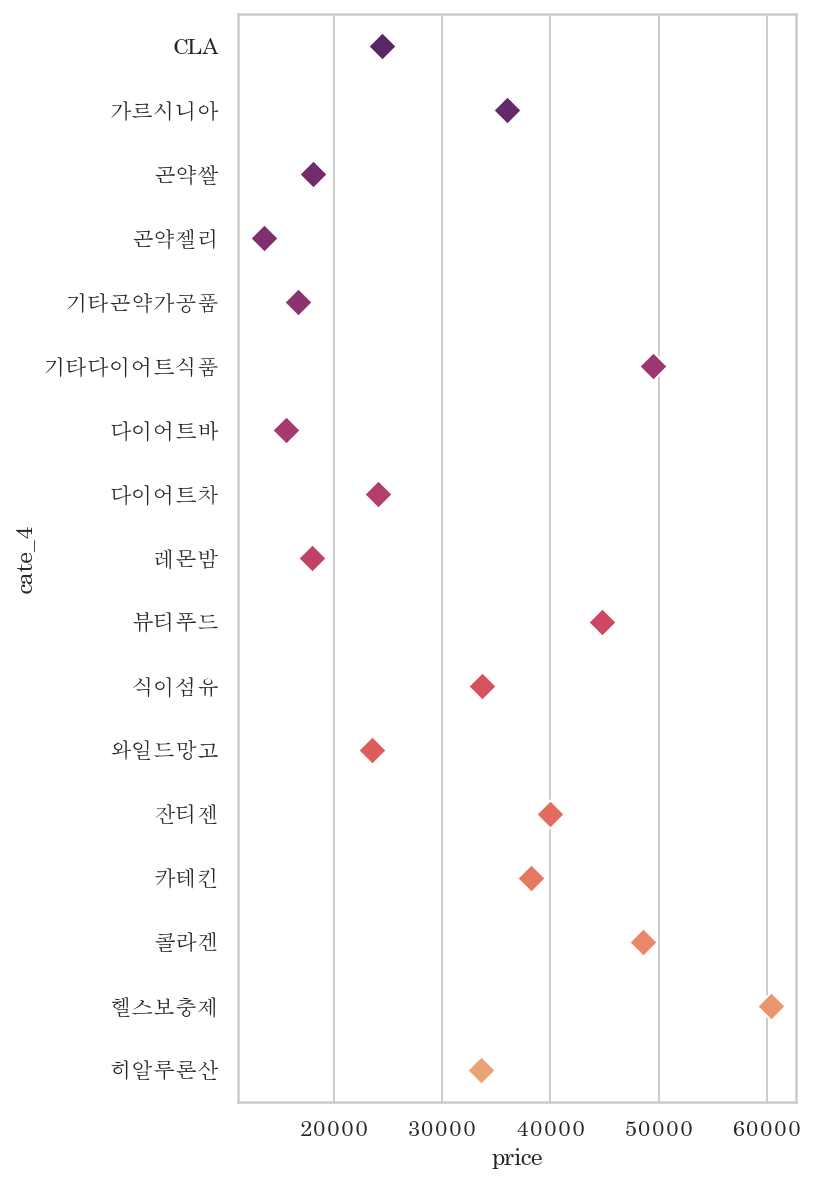

In [8]:
sns.set_theme(style = "whitegrid")
plt.figure(figsize = (5, 10))
plt.rcParams['font.family'] = 'AppleMyungjo'
sns.stripplot(x = "price", 
             y = "cate_4", 
             data = food_price,
             orient = "h",
             jitter = False, 
             palette = "flare_r",
             linewidth = 1,
             edgecolor = "w",
             marker ="D",
             size = 10 
            
             )

### 그래프 그리기 2. 
- 건강식품의 평균 가격

<AxesSubplot:xlabel='price', ylabel='cate_4'>

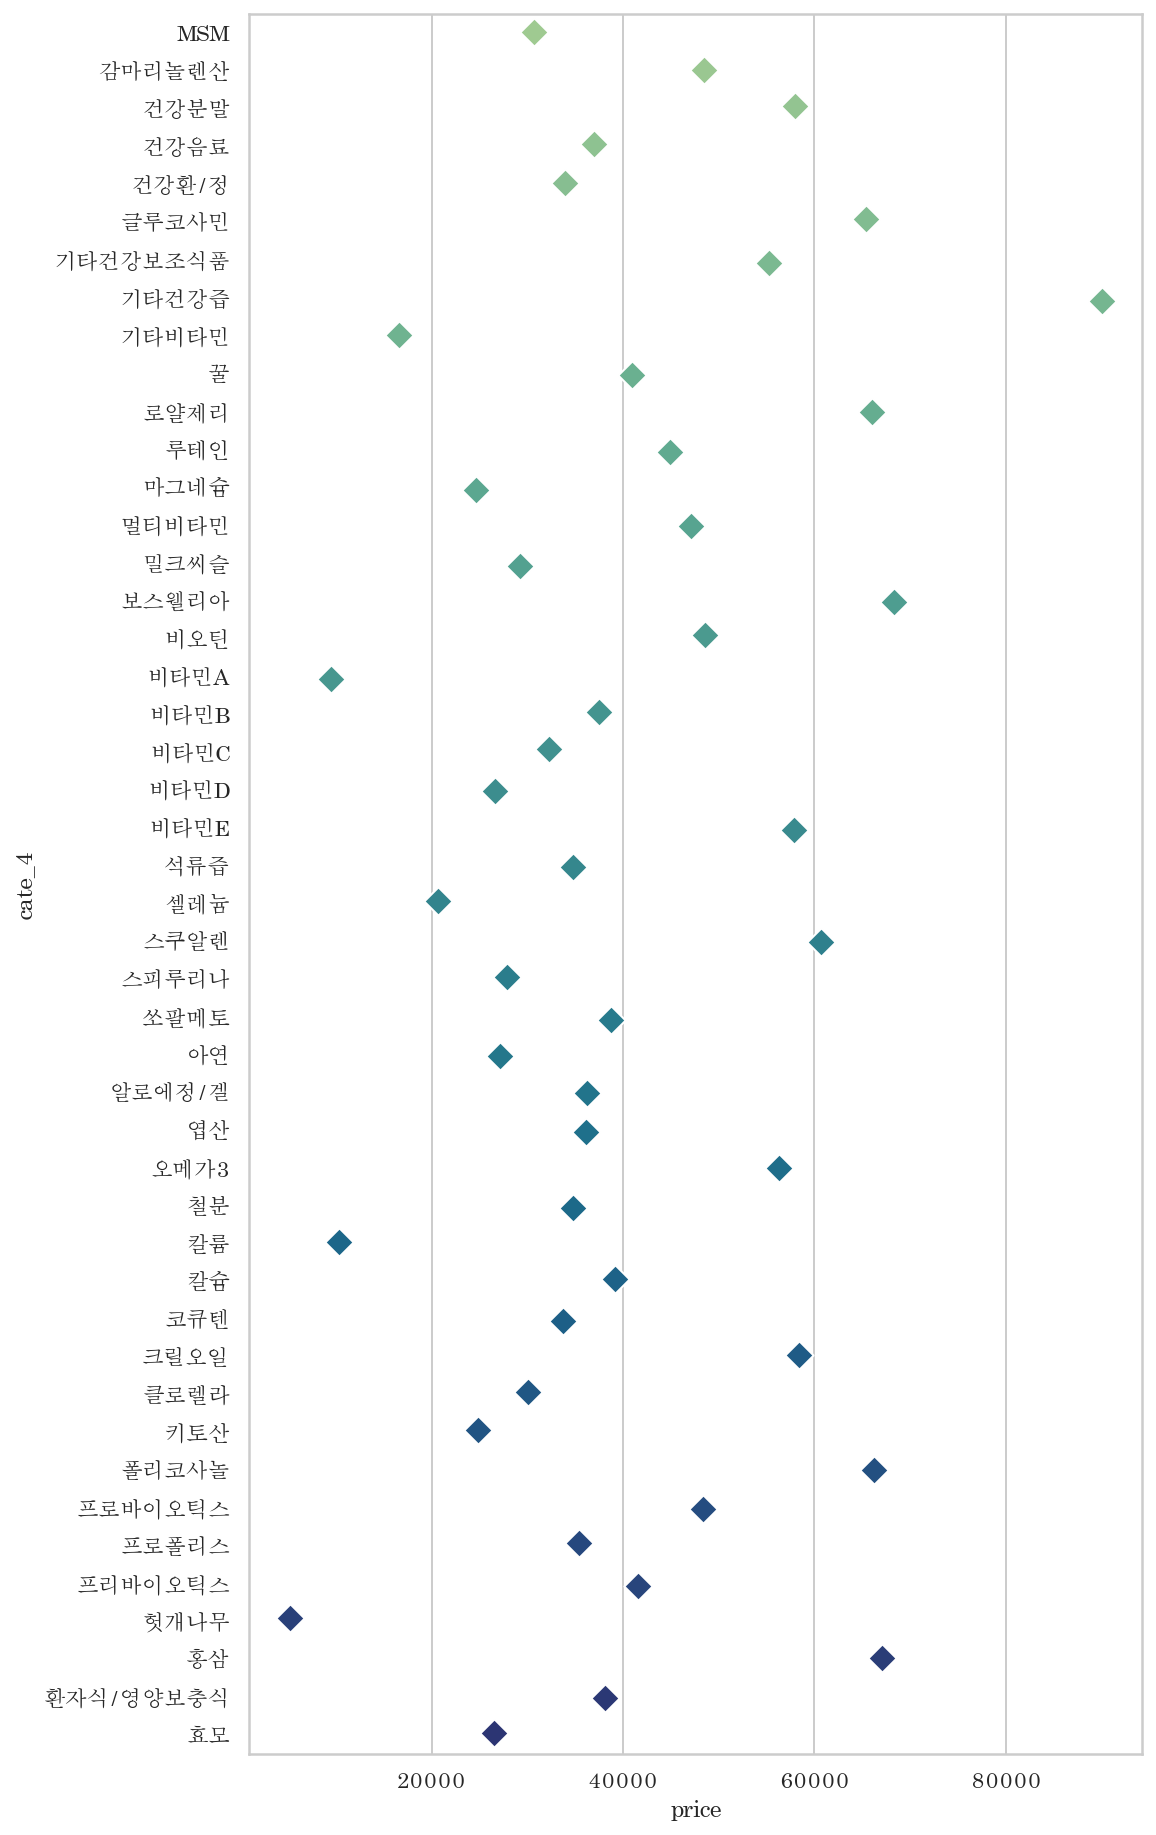

In [9]:
sns.set_theme(style = "whitegrid")
plt.figure(figsize = (8, 16))
plt.rcParams['font.family'] = 'AppleMyungjo'
sns.stripplot(x = "price", 
             y = "cate_4", 
             data = nutrients_price,
             orient = "h",
             palette = "crest",
             linewidth = 1,
             edgecolor = "w",
             marker ="D",
             size = 10 
            
             )

### 쓸데없고 예쁜 그래프를 그려보는 첫번째 시도

- 다이어트 식품의 등록 수와 평균 가격 수 (cate_4 기준)

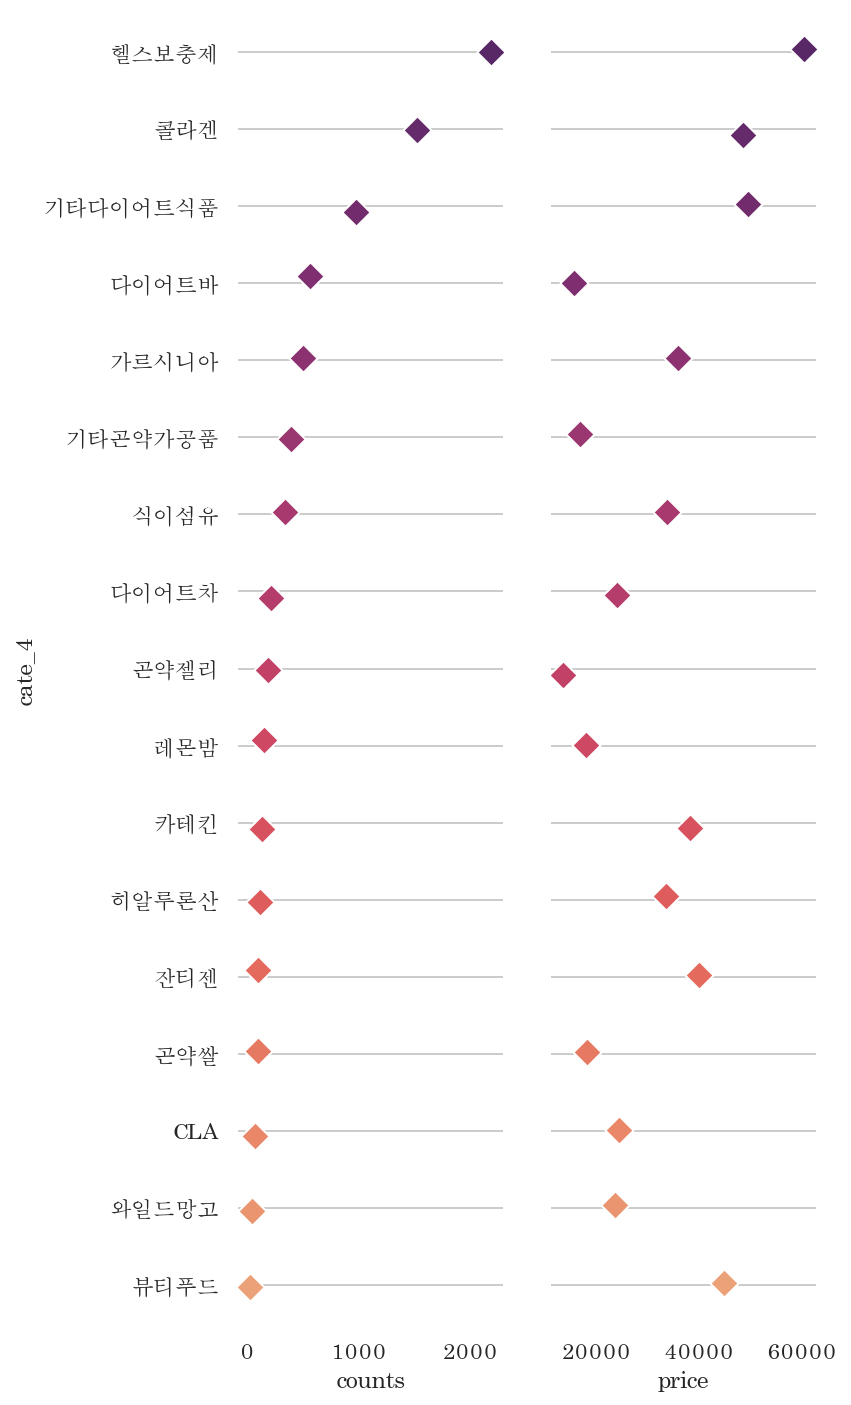

In [10]:
sns.set_theme(style = "whitegrid")
plt.rcParams['font.family'] = 'AppleMyungjo'
newtrial = sns.PairGrid(food_table, x_vars = food_table.columns[1:], y_vars =["cate_4"],
                       height = 10, aspect=.25)

newtrial.map(sns.stripplot, 
             orient = "h",
              
             palette = "flare_r",
             linewidth = 1,
             edgecolor = "w",
             marker ="D",
             size = 10)

newtrial.axes.flat[0].xaxis.grid(False)
newtrial.axes.flat[1].xaxis.grid(False)

newtrial.axes.flat[0].yaxis.grid(True)
newtrial.axes.flat[1].yaxis.grid(True)

sns.despine(left=True, bottom=True)

### 쓸데없고 예쁜 그래프를 그려보는 두번째 시도

- 건강기능식품의 등록 수와 평균 가격 수 (cate_4 기준)

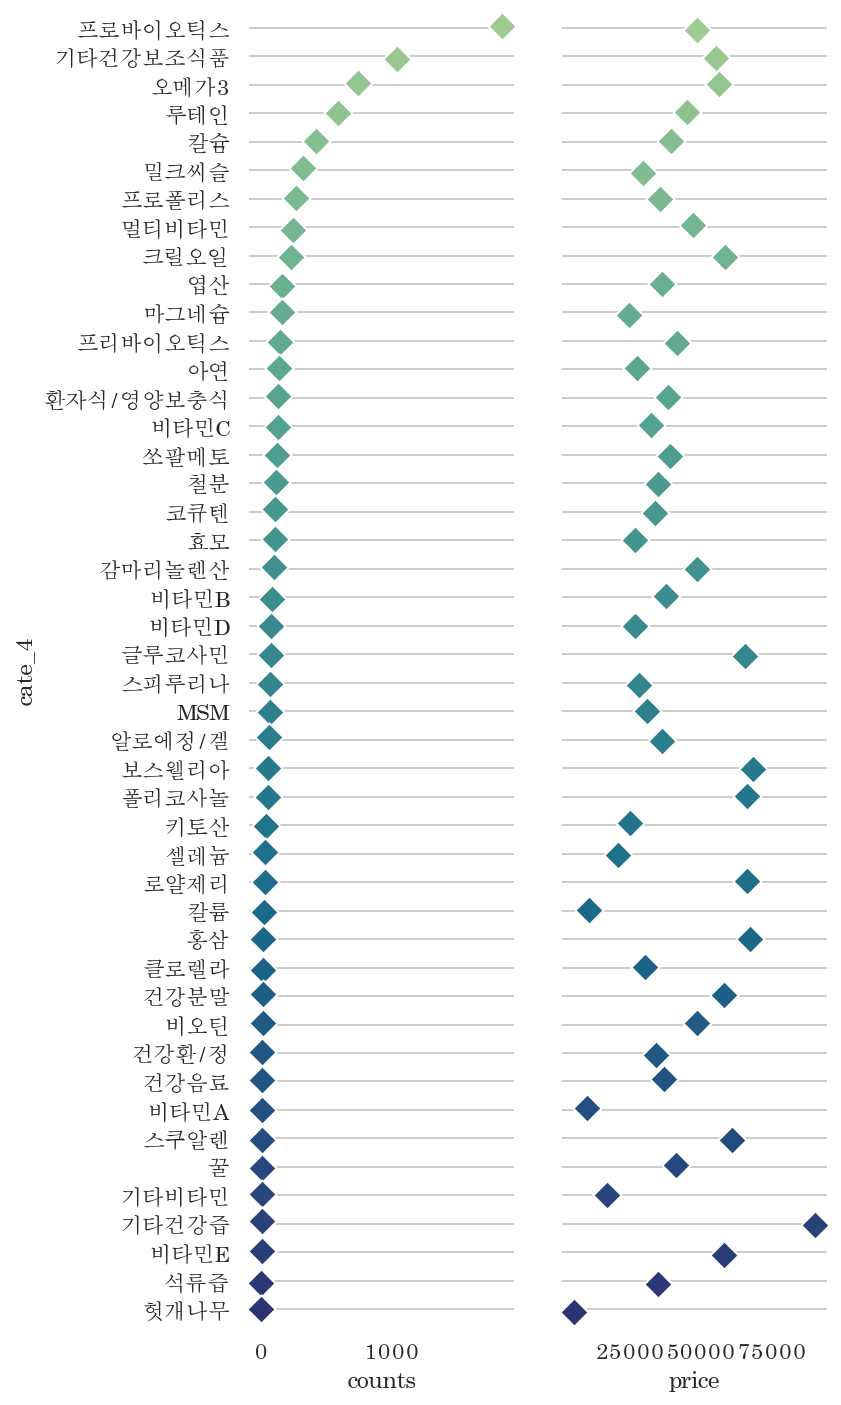

In [11]:
sns.set_theme(style = "whitegrid")
plt.rcParams['font.family'] = 'AppleMyungjo'

newtrial_2 = sns.PairGrid(nutri_table, x_vars = nutri_table.columns[1:], y_vars =["cate_4"],
                       height = 10, aspect=.25)

newtrial_2.map(sns.stripplot, 
             orient = "h",
             
             palette = "crest",
             linewidth = 1,
             edgecolor = "w",
             marker ="D",
             size = 10)

newtrial_2.axes.flat[0].xaxis.grid(False)
newtrial_2.axes.flat[1].xaxis.grid(False)

newtrial_2.axes.flat[0].yaxis.grid(True)
newtrial_2.axes.flat[1].yaxis.grid(True)

sns.despine(left=True, bottom=True)

### 연도 처리 
- date column(8자리 int형)을 연/월(6자리)로 바꾸기 
- 기존의 8자리 숫자를 바로 6자리 날짜로 바꾸려고 하면 에러가 나서,  
- 1) date column을 별도 리스트로 분리 
- 2) 8자리 숫자를 우선 str으로 바꿔 인덱싱으로 맨 뒤 2자리를 날려서 6자리 문자열로 변경하고
- 3) 처리한 리스트를 기존 테이블에 붙이기 
- 4) apply와 직접 정의한 함수를 이용하여 6자리 문자열을 날짜로 변경 (strptime은 string을 받음) 

In [12]:
#다이어트식품 처리 

date_list = []
date_list = healthfood["date"].values.tolist()
re_date = []    
for i in range(len(healthfood)):
    re_date.append(str(date_list[i])[0:6]) 

    
#기존 테이블에 새 컬럼으로 삽입 
healthfood["re_date"] = re_date

In [13]:
#6자리 문자열을 받아 6자리 날짜로 만드는 함수 
def to_date(x) :
    convert_date = datetime.strptime(x, "%Y%m")
    return convert_date

In [14]:
healthfood["re_date"] = healthfood["re_date"].apply(to_date)

In [15]:
healthfood.head(5)

name  price  brand cate_1  cate_2  \
0  절대콜라겐 - 프랑스 저분자 먹는 피쉬 어류 어린 가루 펩타이드 엘라스틴 비오틴  15000  절대콜라겐     식품  다이어트식품   
1                           GRN 분홍이+초록이 시즌2 SET  96000    GRN     식품  다이어트식품   
2                            분홍이 초록이 시즌2 다이어트세트  42780    GRN     식품  다이어트식품   
4                           하드코어버닝티 1+1 이벤트 버닝티  29900    NaN     식품  다이어트식품   
6                                  하드코어 버닝티 90g  29900    NaN     식품  다이어트식품   

     cate_3    cate_4  review      date  \
0       콜라겐       콜라겐  127297  20170617   
1  기타다이어트식품  기타다이어트식품       0  20160629   
2  기타다이어트식품  기타다이어트식품   93928  20190617   
4      뷰티푸드      뷰티푸드   79250  20180220   
6      뷰티푸드      뷰티푸드   75379  20181228   

                                                 tag    cate_5    re_date  
0                                                콜라겐       콜라겐 2017-06-01  
1                                                체지방  기타다이어트식품 2016-06-01  
2                                                NaN  기타다이어트식품 2019-06-01  
4  정성가득,건강에좋은음식,몸에좋은영양소,슈퍼웰빙,건강기능제품,헬씨,20대,40대,30...      뷰티푸드 2018-02-01  
6                                                NaN      뷰티푸드 2018-12-01

In [16]:
#건강기능식품처리

date_list = []
date_list = nutrients["date"].values.tolist()
re_date = []    
for i in range(len(nutrients)):
    re_date.append(str(date_list[i])[0:6]) 

#기존 테이블에 새 컬럼으로 삽입 
nutrients["re_date"] = re_date

In [17]:
nutrients["re_date"] = nutrients["re_date"].apply(to_date) #위에서 정의한 함수 사용

In [18]:
nutrients.head(5)

name  price   brand cate_1  \
88                     SMDR 데이엔딩슬립스타트 (락티움 수면 영양제 보조제)  64500     NaN     식품   
163    곤약 세라마이드+히알라스킨 먹는 인도 곤약감자추출물 히알루론산 /콜라겐,엘라스틴(부)  75800  파이토뉴트리     식품   
168  곤약 세라마이드 - 먹는 인도 곤약감자 세라미드 추출물 피부영양제품 이너뷰티 비오틴(부)  36500  파이토뉴트리     식품   
273                                  슬립밸런스 700mg x 30정  59800  파이토뉴트리     식품   
277                     나우푸드 더블 스트랭스 L-아르기닌 1000mg 타블렛  14900    나우푸드     식품   

    cate_2 cate_3    cate_4  review      date                           tag  \
88    건강식품    영양제  기타건강보조식품   15822  20191114                           NaN   
163   건강식품    영양제  기타건강보조식품   20314  20181214                피부영양제,기타건강기능식품   
168   건강식품    영양제  기타건강보조식품   20069  20180206  피부영양공급,피부영양제,피부장벽강화,기타건강보조식품   
273   건강식품    영양제  기타건강보조식품   16003  20190423                           NaN   
277   건강식품    영양제  기타건강보조식품   15776  20190508                         120개입   

         cate_5    re_date  
88        수면보조제 2019-11-01  
163          곤약 2018-12-01  
168          곤약 2018-02-01  
273       수면보조제 2019-04-01  
277  아르기닌(아미노산) 2019-05-01

### 그래프그리기 3.
 - 다이어트식품 중 등록 제품 순으로 Top 5를 선정하여, 언제 등록되었는지 산점도로 표현 
 - 건강기능식품 중 등록 제품 순으로 Top 5를 선정하여, 언제 등록되었는지 산점도로 표현 
    

In [19]:
#임의의 데이터 처리 
#가장 이른 제품 등록은 2010년 이전에도 이루어졌기 때문에 (min() 사용) 
#임의로 연도를 최근 5개년으로 제한 -> 201601~
#cate_4는 등록 수가 많은 상위 5개를 사용 (위에서 만든 food_counts, nutrients_counts 테이블 재활용하기)

In [20]:
food_top_5 = food_counts.sort_values(by = "name", ascending = False).iloc[:5]["cate_4"]
food_top_5 = list(food_top_5) #시리즈를 리스트로 반환
nutri_top_5 = nutrients_counts.sort_values(by = "name", ascending = False).iloc[:5]["cate_4"]
nutri_top_5 = list(nutri_top_5) 
food_top_5, nutri_top_5

(['헬스보충제', '콜라겐', '기타다이어트식품', '다이어트바', '가르시니아'],
 ['프로바이오틱스', '기타건강보조식품', '오메가3', '루테인', '칼슘'])

In [21]:
food_table_2 = healthfood[healthfood["date"] >= 20160101]
food_table_2 = food_table_2[food_table_2["cate_4"].isin(food_top_5)]

In [22]:
#처리가 잘됐는지 확인하기 
food_table_2["date"].min(), food_table_2["cate_4"].unique()

(20160105, array(['콜라겐', '기타다이어트식품', '헬스보충제', '가르시니아', '다이어트바'], dtype=object))

In [23]:
nutri_table_2 = nutrients[nutrients["date"] >= 20160101]
nutri_table_2 = nutri_table_2[nutri_table_2["cate_4"].isin(nutri_top_5)]

In [24]:
#처리가 잘됐는지 확인하기 
nutri_table_2["date"].min(), nutri_table_2["cate_4"].unique()

(20160106, array(['기타건강보조식품', '프로바이오틱스', '오메가3', '루테인', '칼슘'], dtype=object))

In [25]:
#연/월별 각 제품군이 몇개등록되었는지 확인을 위해 count로 그룹핑하기 
food_group = food_table_2.groupby(["cate_4", "re_date"]).count().reset_index()
nutri_group = nutri_table_2.groupby(["cate_4", "re_date"]).count().reset_index()


<AxesSubplot:xlabel='re_date', ylabel='name'>

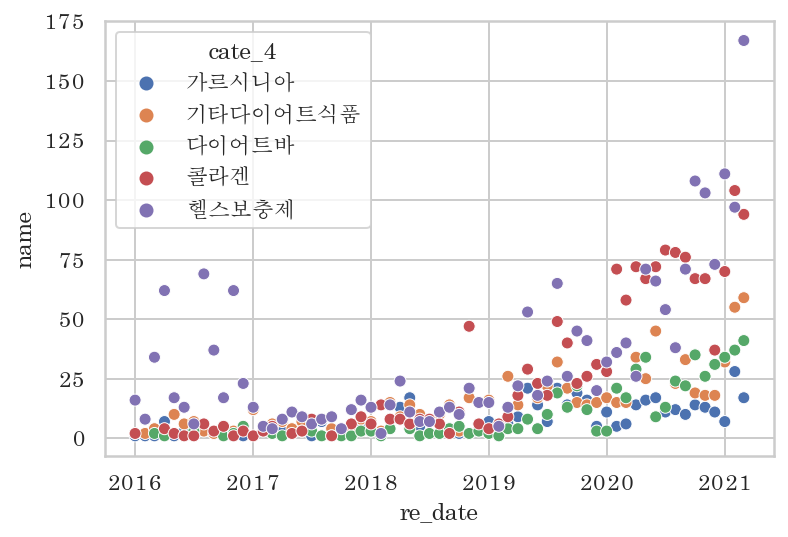

In [26]:
sns.set_theme(style = "whitegrid")
plt.rcParams['font.family'] = 'AppleMyungjo'
sns.scatterplot(x= "re_date", y = "name", data=food_group, hue = "cate_4")


<AxesSubplot:xlabel='re_date', ylabel='name'>

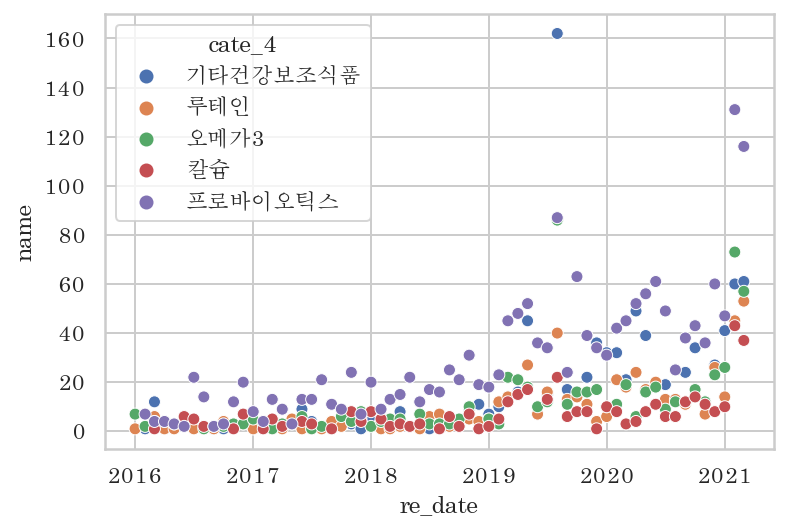

In [27]:
sns.set_theme(style = "whitegrid")
plt.rcParams['font.family'] = 'AppleMyungjo'
sns.scatterplot(x= "re_date", y = "name", data=nutri_group, hue = "cate_4")


### 그래프 그리기 4.
- 위의 그래프를 제품군 별로 개별 그래프로 나타내기 
- subplot 사용 

In [28]:
#데이터셋 분리
health = food_group[food_group["cate_4"] == "헬스보충제"]
collagen = food_group[food_group["cate_4"] == "콜라겐"]
diet_etc = food_group[food_group["cate_4"] == "기타다이어트식품"]
diet_bar = food_group[food_group["cate_4"] == "다이어트바"]
garcinia = food_group[food_group["cate_4"] == "가르시니아"]

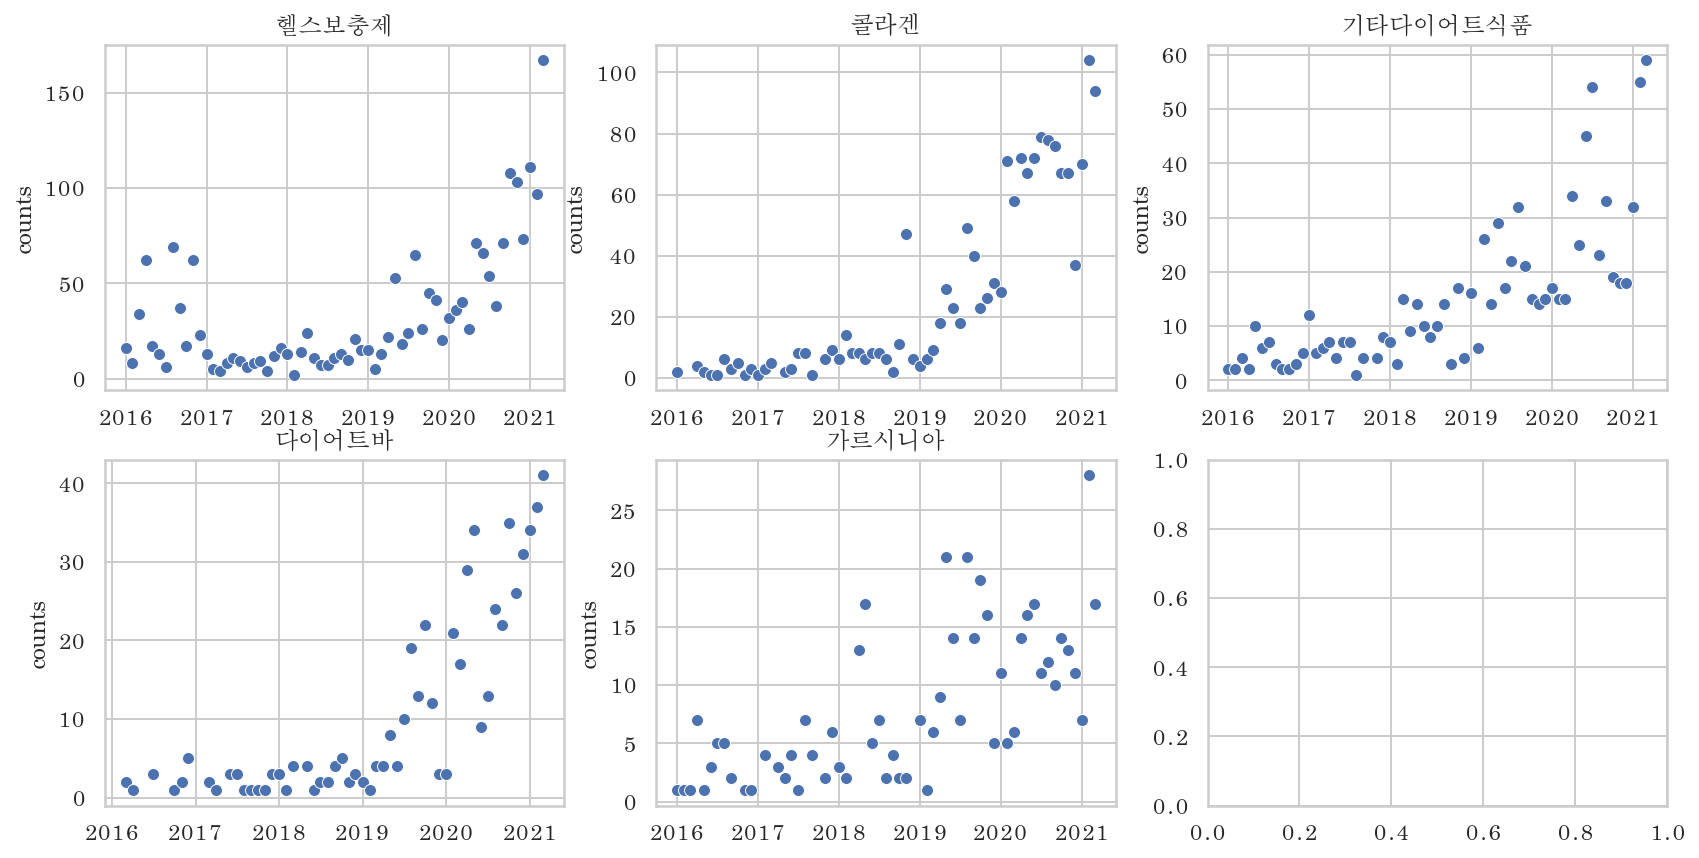

In [29]:
fig, axes = plt.subplots(nrows = 2, ncols =3, figsize = (14, 7))

ax = sns.scatterplot(x= "re_date", y = "name", data=health, ax = axes[0,0])
ax.set_title("헬스보충제")
ax.set_ylabel("counts");ax.set_xlabel("") 

ax = sns.scatterplot(x= "re_date", y = "name", data=collagen, ax = axes[0,1])
ax.set_title("콜라겐")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=diet_etc, ax = axes[0,2])
ax.set_title("기타다이어트식품")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=diet_bar, ax = axes[1,0])
ax.set_title("다이어트바")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=garcinia, ax = axes[1,1])
ax.set_title("가르시니아")
ax.set_ylabel("counts");ax.set_xlabel("")


plt.show()

#### 참고 자료 
- 헬스보충제 등록 수는 네이버 검색 트렌드와 일치
- 왜일까? 어쩌면 허벌라이프가 대세이던 시절이라서? 
- 네이버 트렌드랩에서 성별을 구분해봤을 때 헬스보충제 키워드는 남성이 압도적
- (키워드로서) 헬스보충제의 인기는 점점 사그라들고 최근에는 단백질 보충제가 대세 → 사람들이 "헬스보충제"로 퉁치지 않고 세부 성분별("프로틴", "관절약", "카페인" 등등) 로 챙겨먹기 시작했다고 말할 수 있지 않을까?)


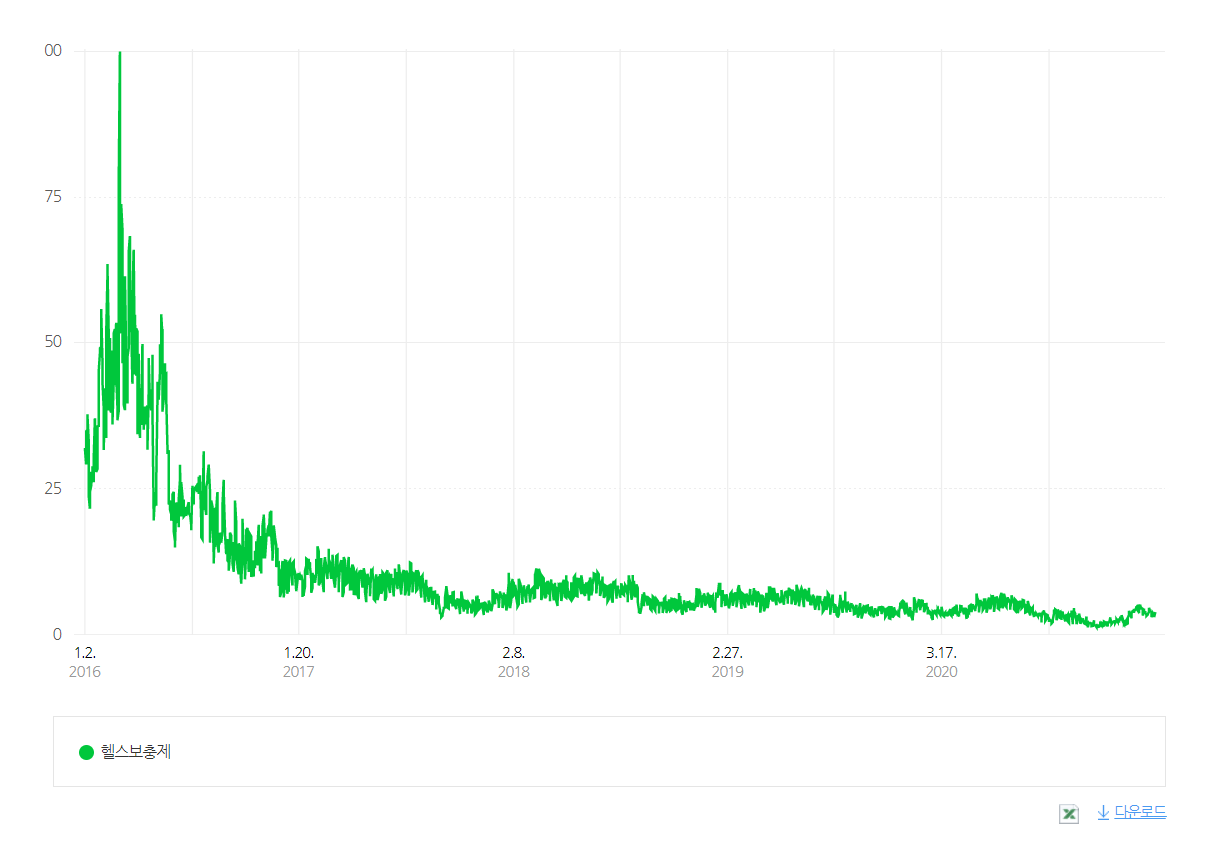
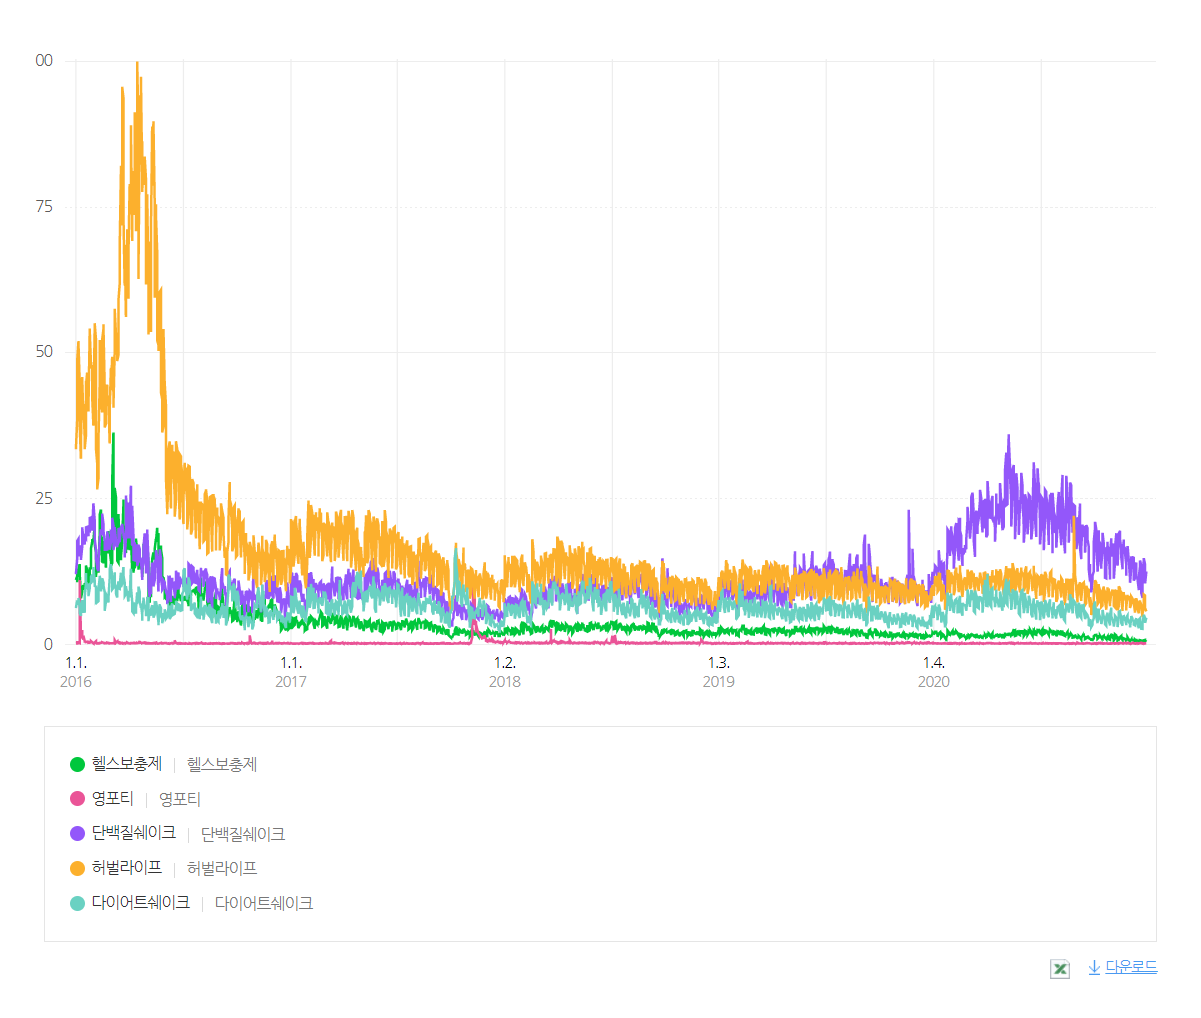


In [30]:
#데이터셋 분리
probio = nutri_group[nutri_group["cate_4"] == "프로바이오틱스"]
health_etc = nutri_group[nutri_group["cate_4"] == "기타건강보조식품"]
omega = nutri_group[nutri_group["cate_4"] == "오메가3"]
lutein = nutri_group[nutri_group["cate_4"] == "루테인"]
cal = nutri_group[nutri_group["cate_4"] == "칼슘"]


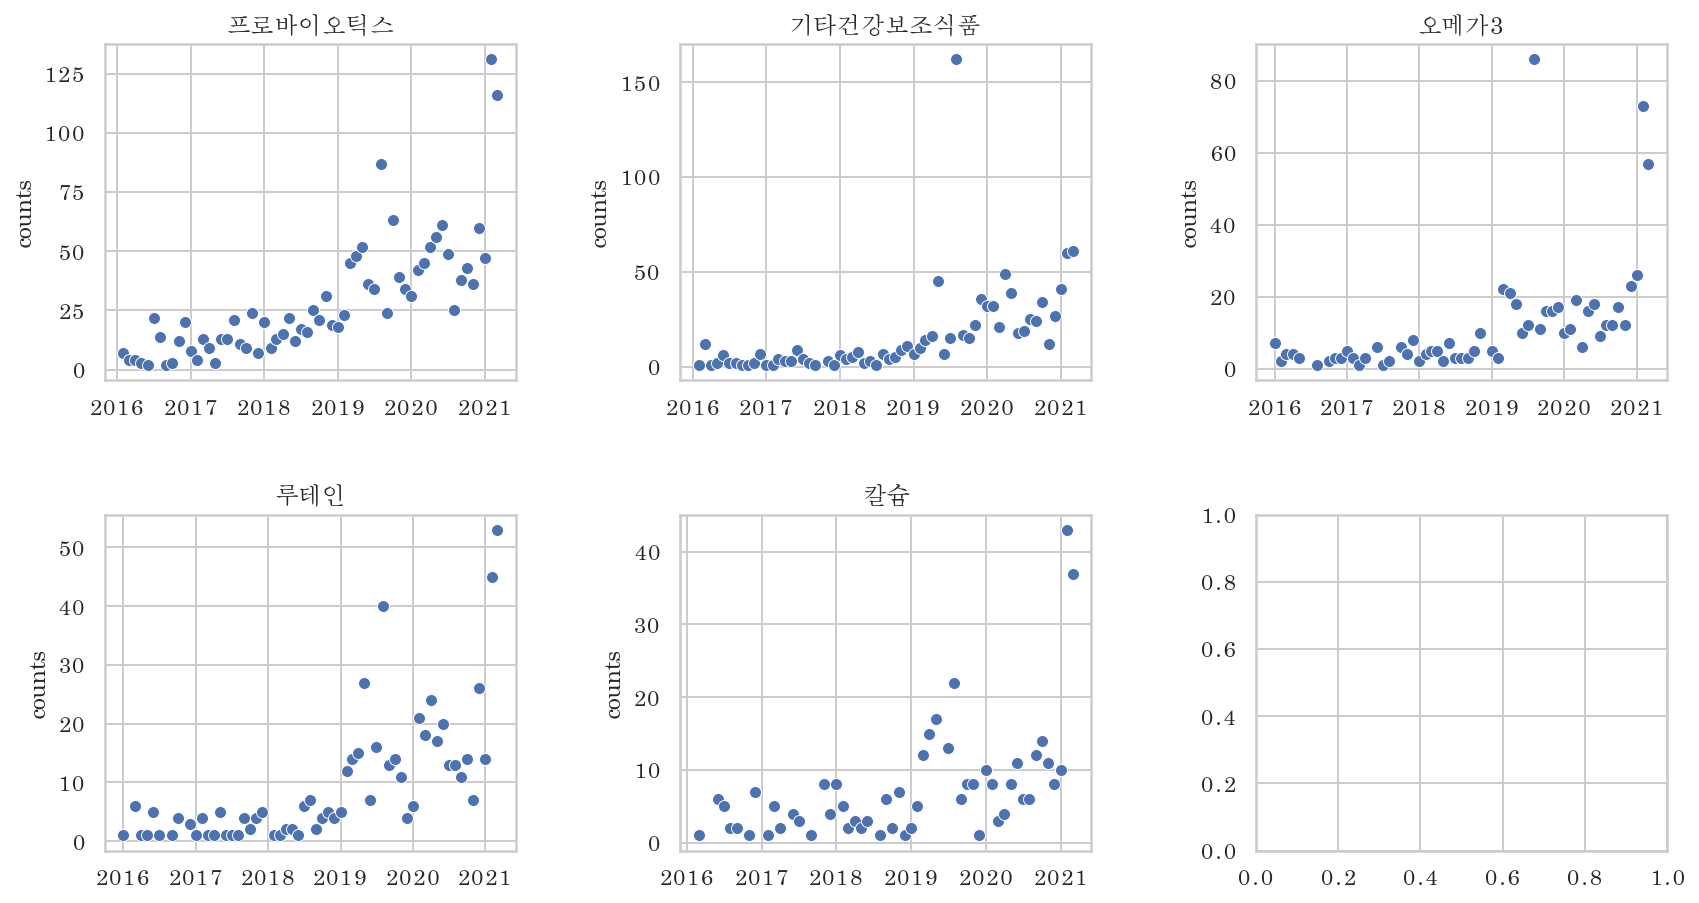

In [31]:
fig, axes = plt.subplots(nrows = 2, ncols =3, figsize = (14, 7))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax = sns.scatterplot(x= "re_date", y = "name", data=probio, ax = axes[0,0])
ax.set_title("프로바이오틱스")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=health_etc, ax = axes[0,1])
ax.set_title("기타건강보조식품")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=omega, ax = axes[0,2])
ax.set_title("오메가3")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=lutein, ax = axes[1,0])
ax.set_title("루테인")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=cal, ax = axes[1,1])
ax.set_title("칼슘")
ax.set_ylabel("counts");ax.set_xlabel("")

plt.show()

In [32]:
nutrients["cate_5"].unique()

array(['수면보조제', '곤약', '아르기닌(아미노산)', '효소', '은행추출물', '초록입홍합', '헤모힘', '타트체리',
       '기타영양제', '매스틱', '구연산', '마카', '초유단백질', '양태반', '아미노산', '베타카로틴',
       '엘더베리', '커큐민', '석류추출물', '퀘르세틴', '기타식물추출물', '크랜베리', '베타인 HCL',
       '숙취해소제', '요오드', '라이코펜', '나토키나제', '노니', '마늘', '타우린', '폴리페놀',
       '대구 간유', '녹용/녹혈', 'SAMe', '프로바이오틱스', '밀크씨슬', '멀티비타민', '오메가3',
       '크릴오일', '비타민C', '환자식/영양보충식', '루테인', '홍삼', '프리바이오틱스', '마그네슘', '엽산',
       '프로폴리스', '폴리코사놀', '비타민B', '기타건강보조식품', '칼슘', '알로에정/겔', '비타민D',
       '코큐텐', '철분', '보스웰리아', '효모', '스피루리나', '아연', '키토산', '쏘팔메토', '글루코사민',
       '비오틴', '감마리놀렌산', 'MSM', '칼륨', '건강분말', '클로렐라', '셀레늄', '헛개나무',
       '건강음료', '로얄제리', '비타민A', '스쿠알렌', '건강환/정', '석류즙', '기타건강즙', '꿀',
       '비타민E', '기타비타민'], dtype=object)

In [33]:
nutri_table_3 = nutrients[nutrients["date"] >= 20160101]
nutri_table_3 = nutri_table_3[nutri_table_3["cate_5"].isin(["초록입홍합", "멀티비타민","밀크씨슬","초유단백질", "수면보조제", "곤약"])]
nutri_group_3 = nutri_table_3.groupby(["cate_5", "re_date"]).count().reset_index()

mussel = nutri_group_3[nutri_group_3["cate_5"] == "초록입홍합"]
vit = nutri_group_3[nutri_group_3["cate_5"] == "멀티비타민"]
milk = nutri_group_3[nutri_group_3["cate_5"] == "밀크씨슬"]
protein = nutri_group_3[nutri_group_3["cate_5"] == "초유단백질"]
sleep = nutri_group_3[nutri_group_3["cate_5"] == "수면보조제"]
gonjac = nutri_group_3[nutri_group_3["cate_5"] == "곤약"]


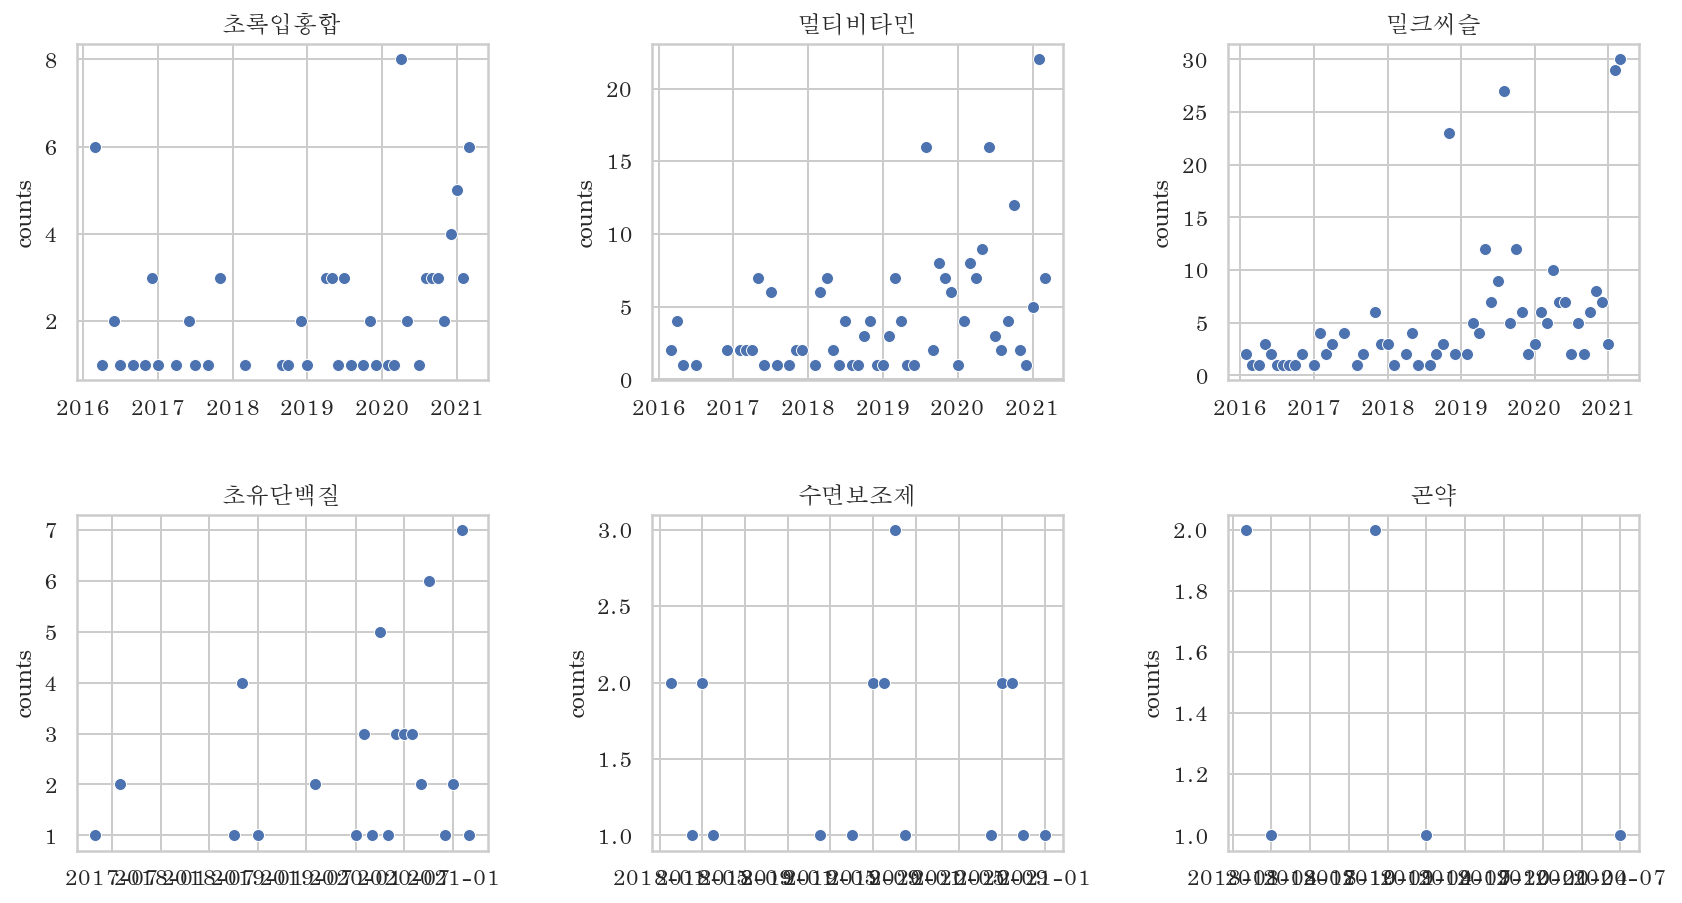

In [34]:
fig, axes = plt.subplots(nrows = 2, ncols =3, figsize = (14, 7))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax = sns.scatterplot(x= "re_date", y = "name", data=mussel, ax = axes[0,0])
ax.set_title("초록입홍합")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=vit, ax = axes[0,1])
ax.set_title("멀티비타민")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=milk, ax = axes[0,2])
ax.set_title("밀크씨슬")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=protein, ax = axes[1,0])
ax.set_title("초유단백질")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=sleep, ax = axes[1,1])
ax.set_title("수면보조제")
ax.set_ylabel("counts");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "name", data=gonjac, ax = axes[1,2])
ax.set_title("곤약")
ax.set_ylabel("counts");ax.set_xlabel("")

plt.show()

### 그래프 그리기 5.
- 이번엔 제품군별로 x : 등록 시기 - y : 가격의 그래프
- 그냥 많이 등록될 때 가격도 다양한 것 같다...
- subplot 사용 

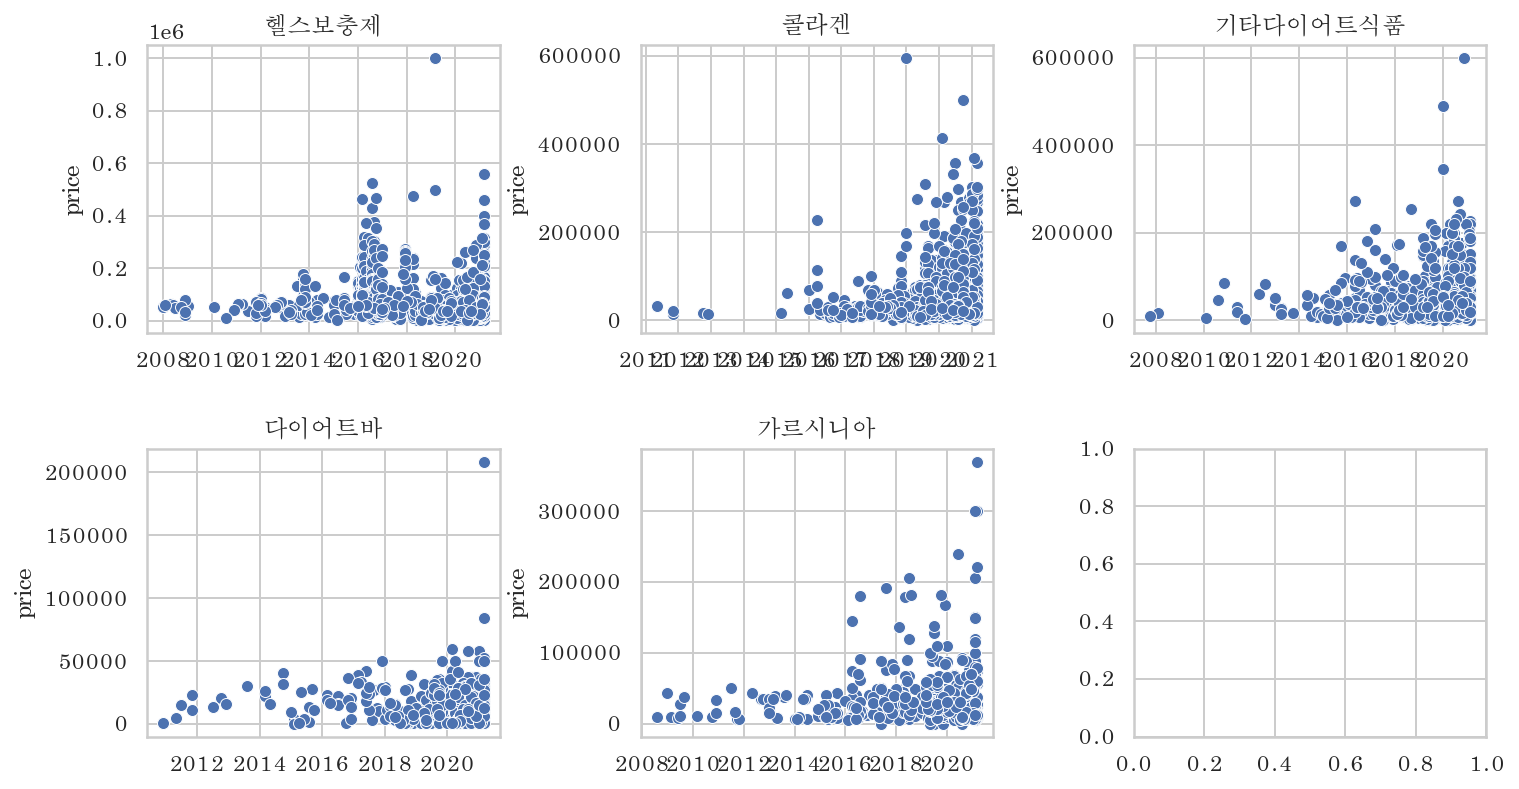

In [35]:
fig, axes = plt.subplots(nrows = 2, ncols =3, figsize = (12, 6))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax = sns.scatterplot(x= "re_date", y = "price", data=healthfood[healthfood["cate_4"]=="헬스보충제"], ax = axes[0,0])
ax.set_title("헬스보충제")
ax.set_ylabel("price");ax.set_xlabel("") 

ax = sns.scatterplot(x= "re_date", y = "price", data=healthfood[healthfood["cate_4"]=="콜라겐"], ax = axes[0,1])
ax.set_title("콜라겐")
ax.set_ylabel("price");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "price", data=healthfood[healthfood["cate_4"]=="기타다이어트식품"], ax = axes[0,2])
ax.set_title("기타다이어트식품")
ax.set_ylabel("price");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "price", data=healthfood[healthfood["cate_4"]=="다이어트바"], ax = axes[1,0])
ax.set_title("다이어트바")
ax.set_ylabel("price");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "price", data=healthfood[healthfood["cate_4"]=="가르시니아"], ax = axes[1,1])
ax.set_title("가르시니아")
ax.set_ylabel("price");ax.set_xlabel("")


plt.show()

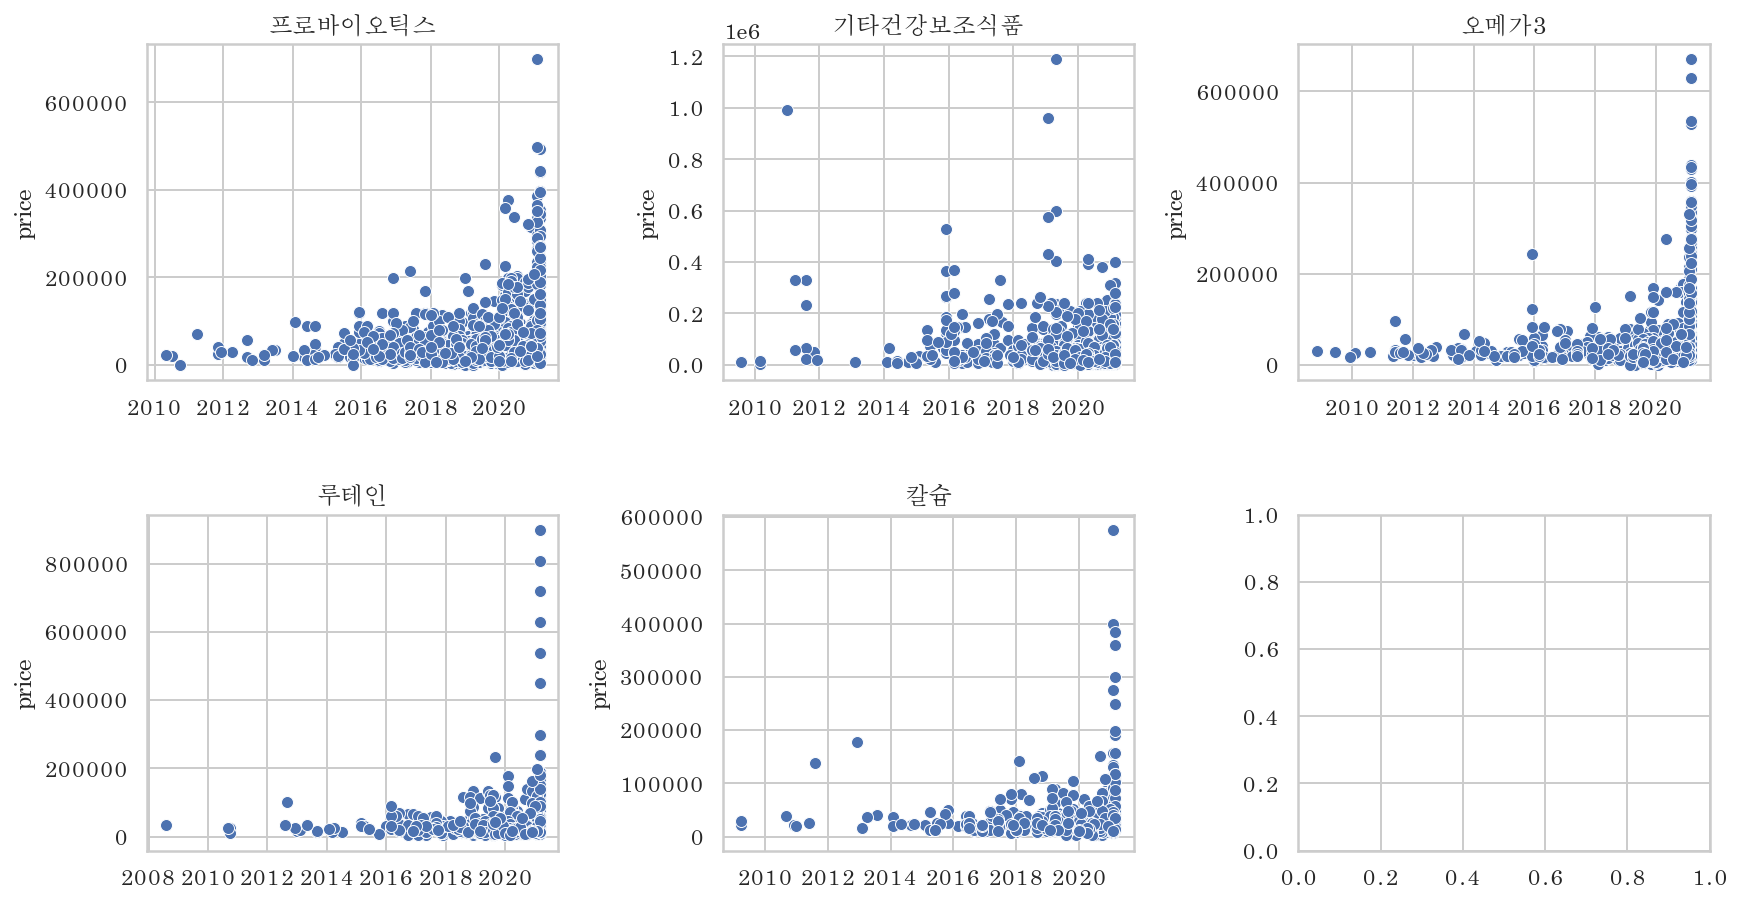

In [36]:
fig, axes = plt.subplots(nrows = 2, ncols =3, figsize = (14, 7))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax = sns.scatterplot(x= "re_date", y = "price", data=nutrients[nutrients["cate_4"]=="프로바이오틱스"], ax = axes[0,0])
ax.set_title("프로바이오틱스")
ax.set_ylabel("price");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "price", data=nutrients[nutrients["cate_4"]=="기타건강보조식품"], ax = axes[0,1])
ax.set_title("기타건강보조식품")
ax.set_ylabel("price");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "price", data=nutrients[nutrients["cate_4"]=="오메가3"], ax = axes[0,2])
ax.set_title("오메가3")
ax.set_ylabel("price");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "price", data=nutrients[nutrients["cate_4"]=="루테인"], ax = axes[1,0])
ax.set_title("루테인")
ax.set_ylabel("price");ax.set_xlabel("")

ax = sns.scatterplot(x= "re_date", y = "price", data=nutrients[nutrients["cate_4"]=="칼슘"], ax = axes[1,1])
ax.set_title("칼슘")
ax.set_ylabel("price");ax.set_xlabel("")

plt.show()

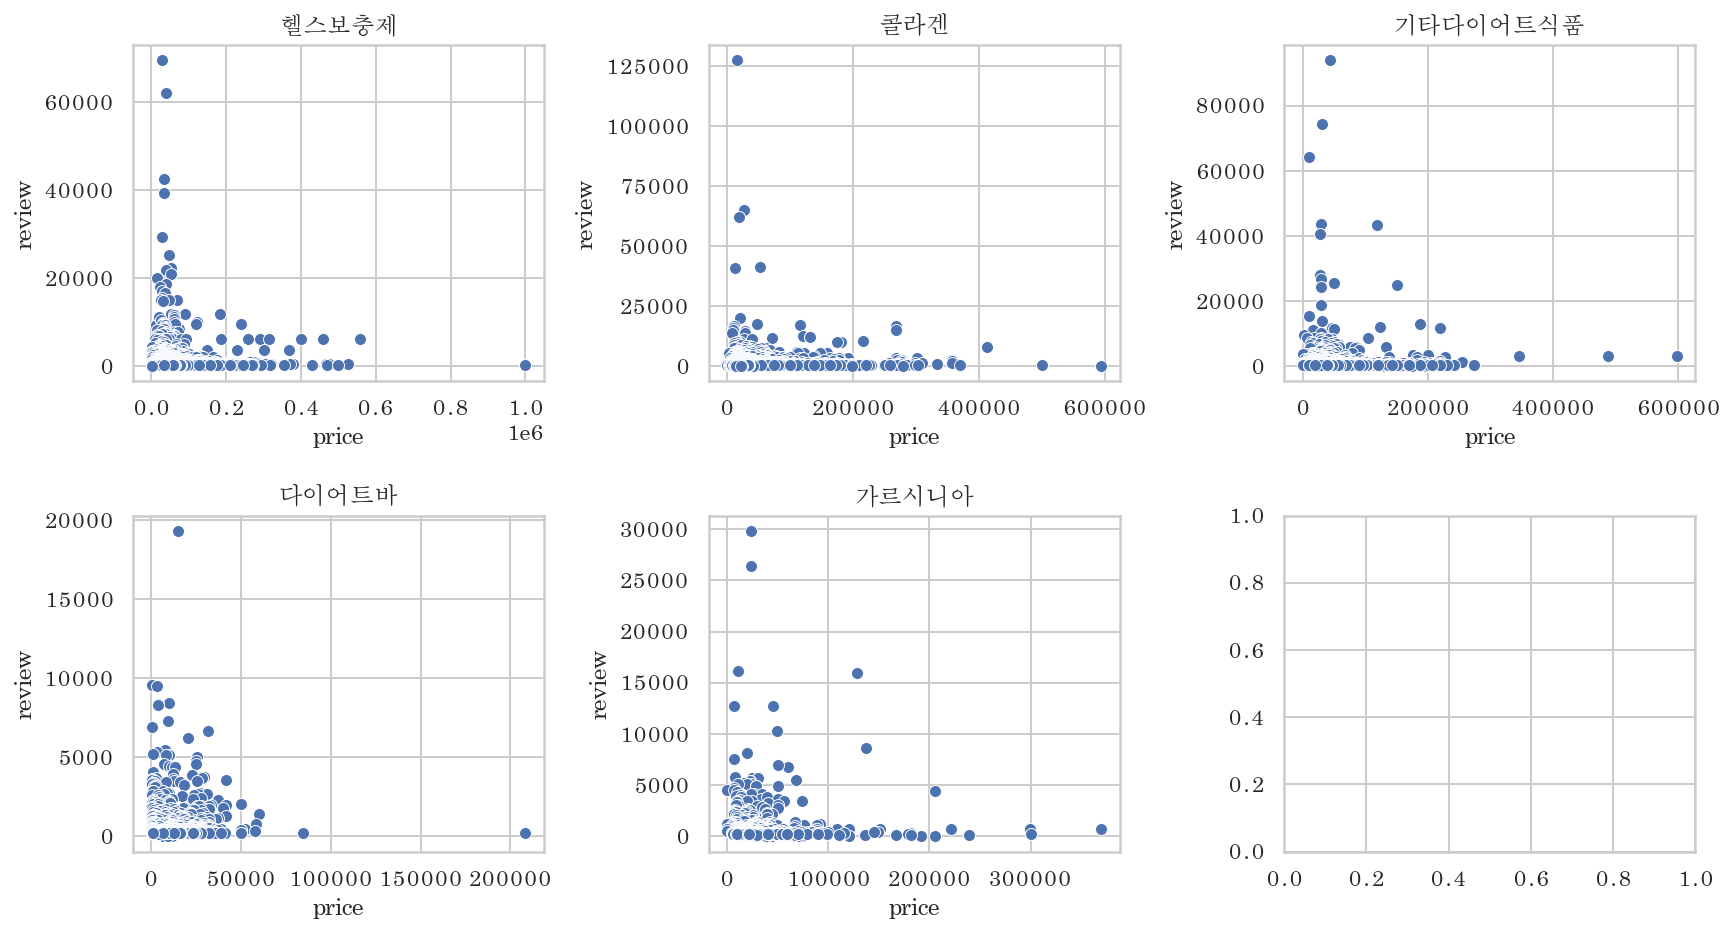

In [37]:
fig, axes = plt.subplots(nrows = 2, ncols =3, figsize = (14, 7))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax = sns.scatterplot(x= "price", y = "review", data=healthfood[healthfood["cate_4"]=="헬스보충제"], ax = axes[0,0])
ax.set_title("헬스보충제")
ax.set_ylabel("review");ax.set_xlabel("price") 

ax = sns.scatterplot(x= "price", y = "review", data=healthfood[healthfood["cate_4"]=="콜라겐"], ax = axes[0,1])
ax.set_title("콜라겐")
ax.set_ylabel("review");ax.set_xlabel("price") 

ax = sns.scatterplot(x= "price", y = "review", data=healthfood[healthfood["cate_4"]=="기타다이어트식품"], ax = axes[0,2])
ax.set_title("기타다이어트식품")
ax.set_ylabel("review");ax.set_xlabel("price") 

ax = sns.scatterplot(x= "price", y = "review", data=healthfood[healthfood["cate_4"]=="다이어트바"], ax = axes[1,0])
ax.set_title("다이어트바")
ax.set_ylabel("review");ax.set_xlabel("price") 

ax = sns.scatterplot(x= "price", y = "review", data=healthfood[healthfood["cate_4"]=="가르시니아"], ax = axes[1,1])
ax.set_title("가르시니아")
ax.set_ylabel("review");ax.set_xlabel("price") 


plt.show()

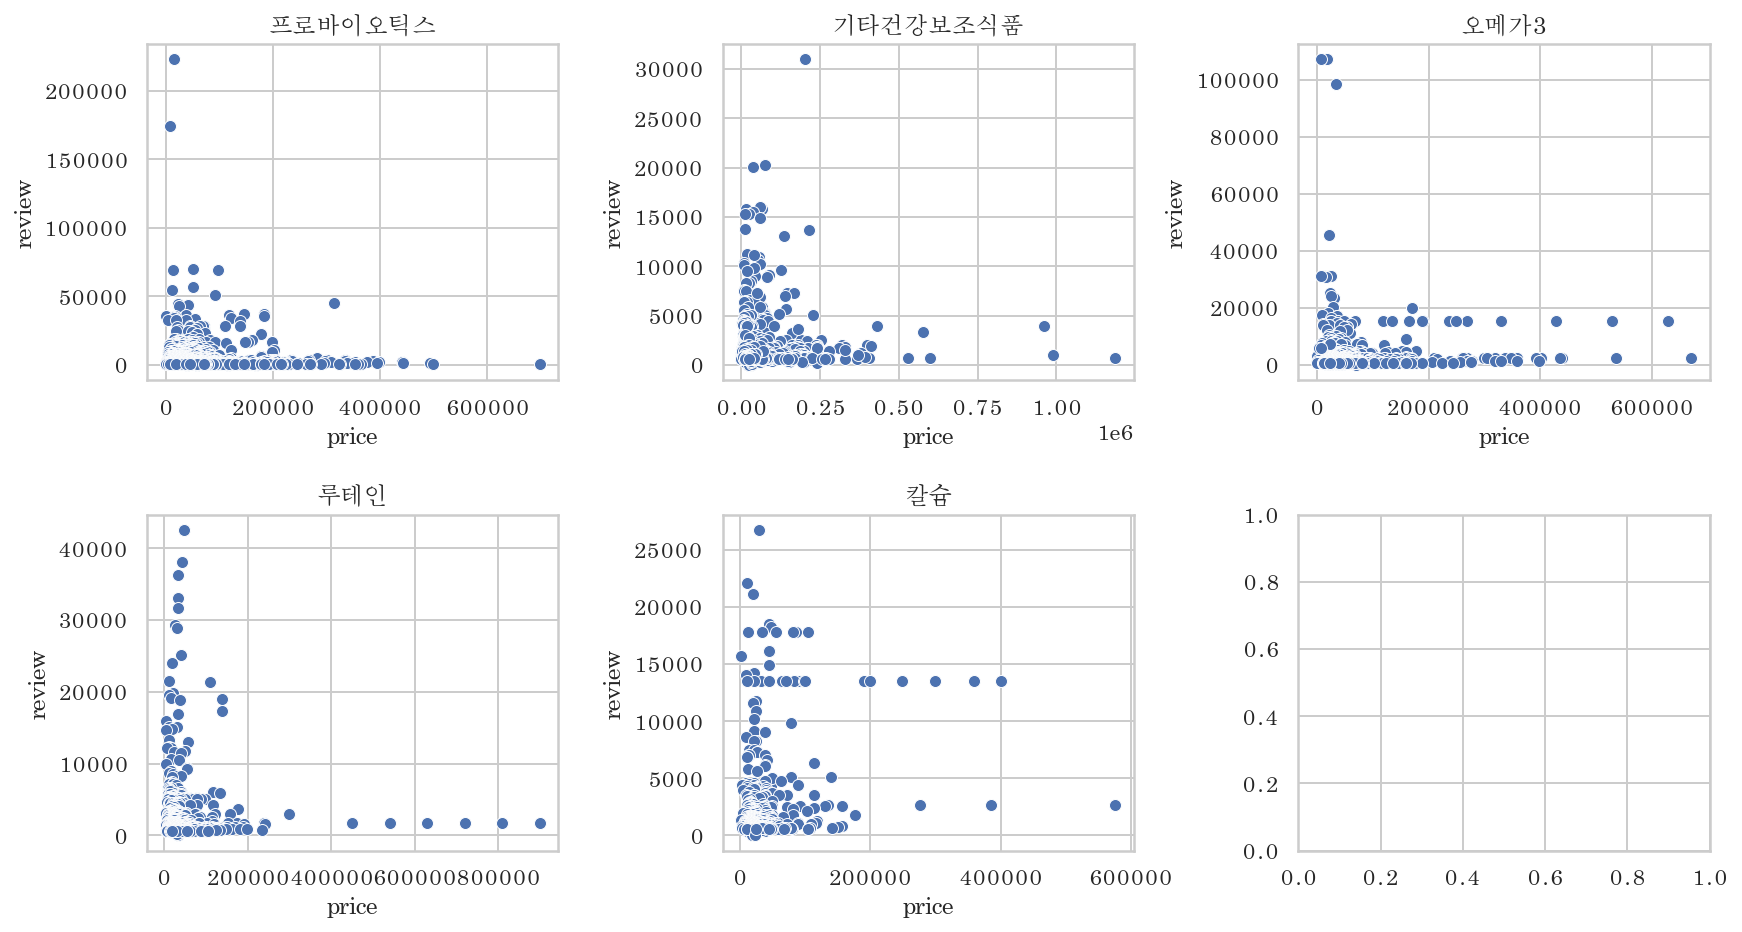

In [38]:
fig, axes = plt.subplots(nrows = 2, ncols =3, figsize = (14, 7))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

ax = sns.scatterplot(x= "price", y = "review", data=nutrients[nutrients["cate_4"]=="프로바이오틱스"], ax = axes[0,0])
ax.set_title("프로바이오틱스")
ax.set_ylabel("review");ax.set_xlabel("price")

ax = sns.scatterplot(x= "price", y = "review", data=nutrients[nutrients["cate_4"]=="기타건강보조식품"], ax = axes[0,1])
ax.set_title("기타건강보조식품")
ax.set_ylabel("review");ax.set_xlabel("price")

ax = sns.scatterplot(x= "price", y = "review", data=nutrients[nutrients["cate_4"]=="오메가3"], ax = axes[0,2])
ax.set_title("오메가3")
ax.set_ylabel("review");ax.set_xlabel("price")

ax = sns.scatterplot(x= "price", y = "review", data=nutrients[nutrients["cate_4"]=="루테인"], ax = axes[1,0])
ax.set_title("루테인")
ax.set_ylabel("review");ax.set_xlabel("price")

ax = sns.scatterplot(x= "price", y = "review", data=nutrients[nutrients["cate_4"]=="칼슘"], ax = axes[1,1])
ax.set_title("칼슘")
ax.set_ylabel("review");ax.set_xlabel("price")

plt.show()

궁금한 것 몇 가지

- 사람들이 꾸준히 먹는 기본적인 것들(like 유산균)은 대체로 가성비 구입이 많고 
  특별히 추가적으로 먹는 것들(꾸준히는 안 먹고 가끔 챙겨먹는 좋은 것들 - like 밀크씨슬)은 가격대가 다양할까? 

- 아동용은 좀더 비쌀까? (키즈 영양제 등 부모가 아이를 위해 구입하는 물건) 

- 헬스보충제는 계속 먹어야 하니 대체로 가성비로 구입하고 / 가르시니아 같은 단기용은 비싸도 살까?


정리하자면 --------------------------------------------------------

- 1. 단기효과용 / 혹은 가끔 먹는 것들은 비싸도 리뷰가 많고, 
     장기적으로 먹어야 하는 꾸준템은 가성비 구입이 많을 것이다 (쌀 수록 리뷰가 많을 것이다)
     *홍삼의 경우, 장기적으로 먹어야 하는 꾸준템인데 비싸서 버림받았다 
     *효과에 따른 가격 정책 제안(...)
     
- 2. 단기효과용은 올라오는 시즌이 있고, 장기효과용은 딱히 시즌이 발견되지 않을 것이다
     
- 3. 어린이용은 성인용에 비해 비싸다? (아이를 위해 구입~~)



In [39]:
question = nutrients[["name", "re_date"]].groupby("re_date").count().reset_index()

<AxesSubplot:xlabel='re_date', ylabel='name'>

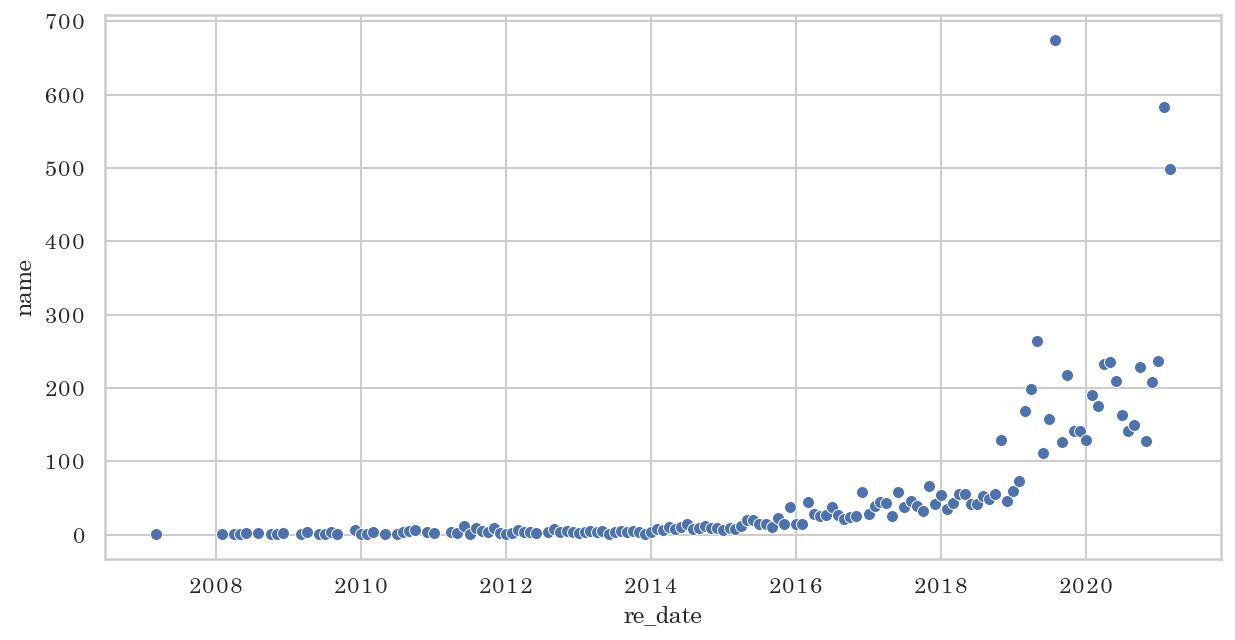

In [40]:
plt.figure(figsize = (10,5))
sns.scatterplot(x= "re_date", y = "name", data=question)
#의외로 제품수가 급증하는 건 19년도부터인듯... 

In [41]:
# cate_3 항목별
# 영양제 & 비타민이 16년도부터 증가세를 보이더니, 19년도부터 폭발적으로 증가
# 그외 카테고리들은 일정한 수요가 지속

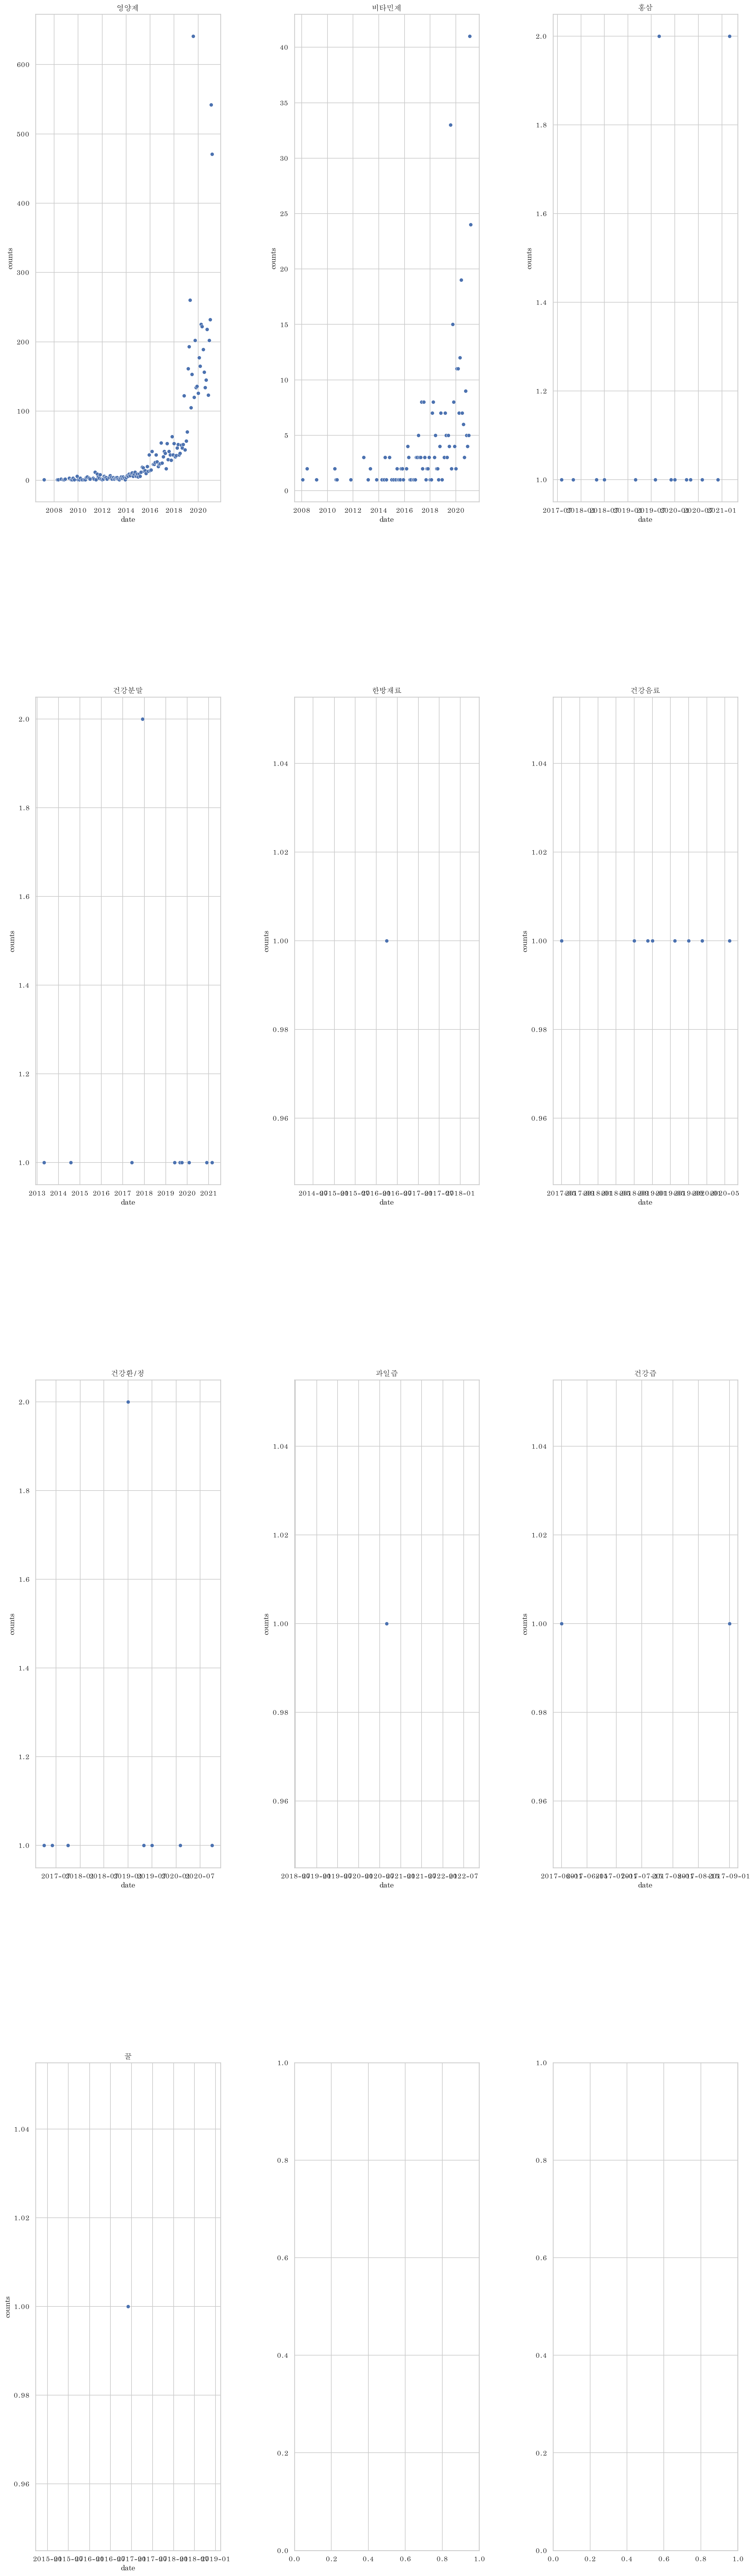

In [42]:
fig, axes = plt.subplots(nrows = (len(list(nutrients["cate_3"].unique())) // 3)+1, ncols = 3, figsize = (20, 70))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
cate_list = list(nutrients["cate_3"].unique())
for index, cate_name in enumerate(cate_list):
    grouping = nutrients[nutrients["cate_3"] == cate_name].groupby(["cate_3", "re_date"]).count().reset_index()
    ax = sns.scatterplot(x= "re_date", y = "name", data=grouping,
                     ax = axes[index//3, index%3])
    ax.set_title(cate_name)
    ax.set_ylabel("counts");ax.set_xlabel("date")
plt.show() 

In [43]:
# cate_4
# 엽산, 프로폴리스, 아연, 쏘팔메토, 글루코사민, 감마리놀레산, 비타민C, 프로바이오틱스는 19년도부터 폭발적 증가 추세

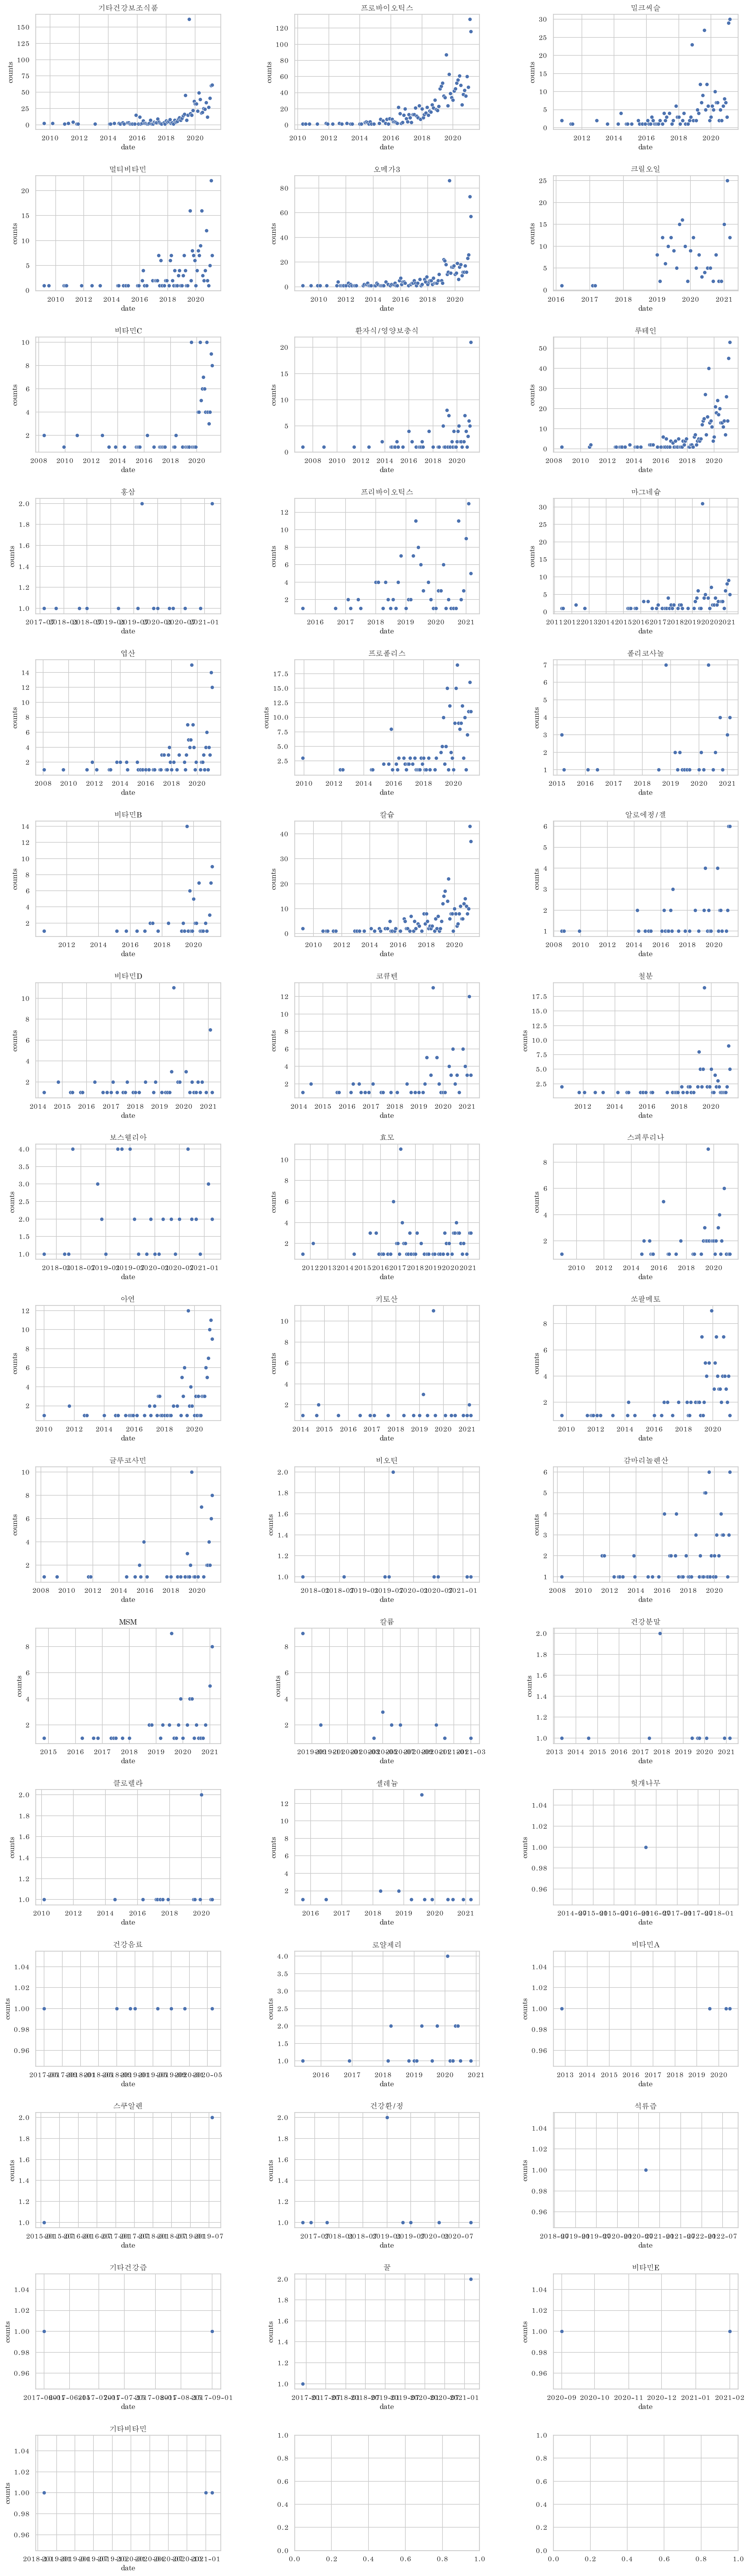

In [44]:
fig, axes = plt.subplots(nrows = (len(list(nutrients["cate_4"].unique())) // 3)+1, ncols = 3, figsize = (20, 70))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
cate_list = list(nutrients["cate_4"].unique())
for index, cate_name in enumerate(cate_list):
    grouping = nutrients[nutrients["cate_4"] == cate_name].groupby(["cate_4", "re_date"]).count().reset_index()
    ax = sns.scatterplot(x= "re_date", y = "name", data=grouping,
                     ax = axes[index//3, index%3])
    ax.set_title(cate_name)
    ax.set_ylabel("counts");ax.set_xlabel("date")
plt.show() 

In [45]:
# cate_5
# 초록입홍합, 초유단백질, 기타식물추출물, 루테인, 비타민C, 프로폴리스, 아연, 쏘팔메토, 글루코사민, 감마리놀렌산 19년도부터 증가추세

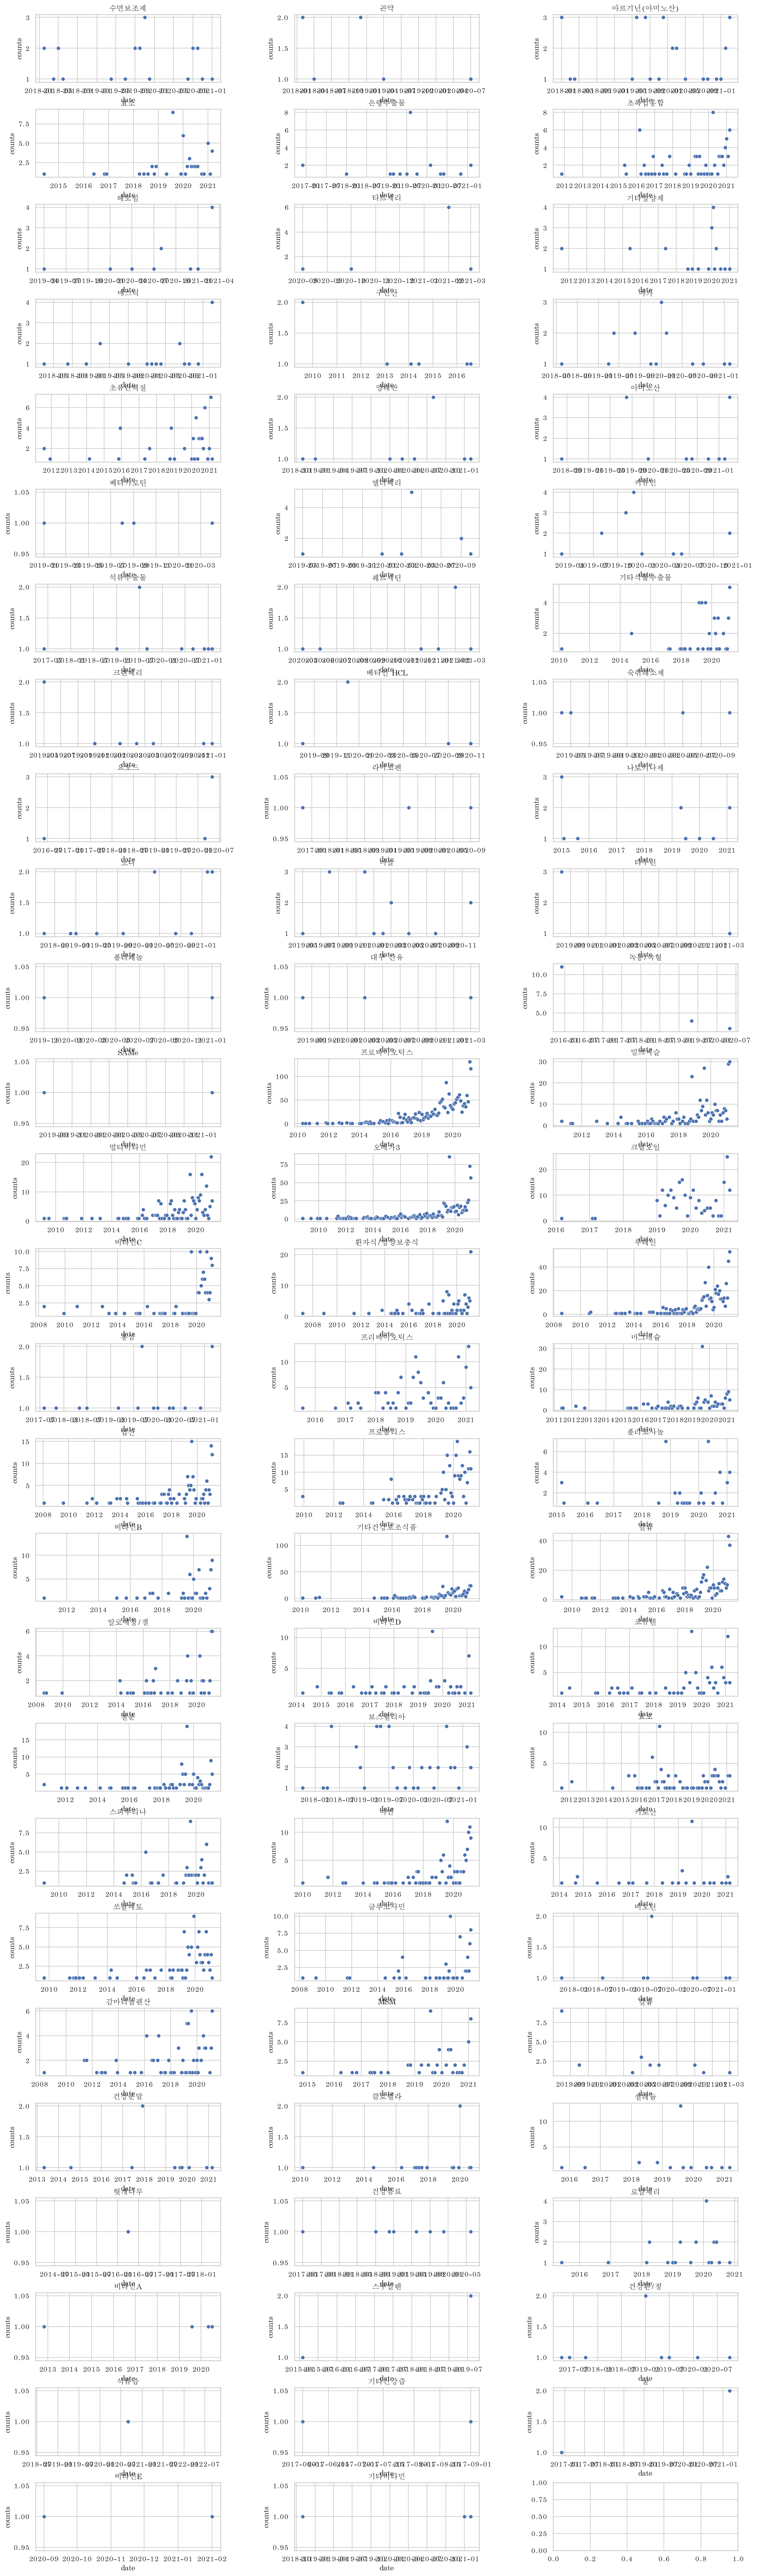

In [46]:
fig, axes = plt.subplots(nrows = (len(list(nutrients["cate_5"].unique())) // 3)+1, ncols = 3, figsize = (20, 70))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
cate_list = list(nutrients["cate_5"].unique())
for index, cate_name in enumerate(cate_list):
    grouping = nutrients[nutrients["cate_5"] == cate_name].groupby(["cate_5", "re_date"]).count().reset_index()
    ax = sns.scatterplot(x= "re_date", y = "name", data=grouping,
                     ax = axes[index//3, index%3])
    ax.set_title(cate_name)
    ax.set_ylabel("counts");ax.set_xlabel("date")
plt.show() 

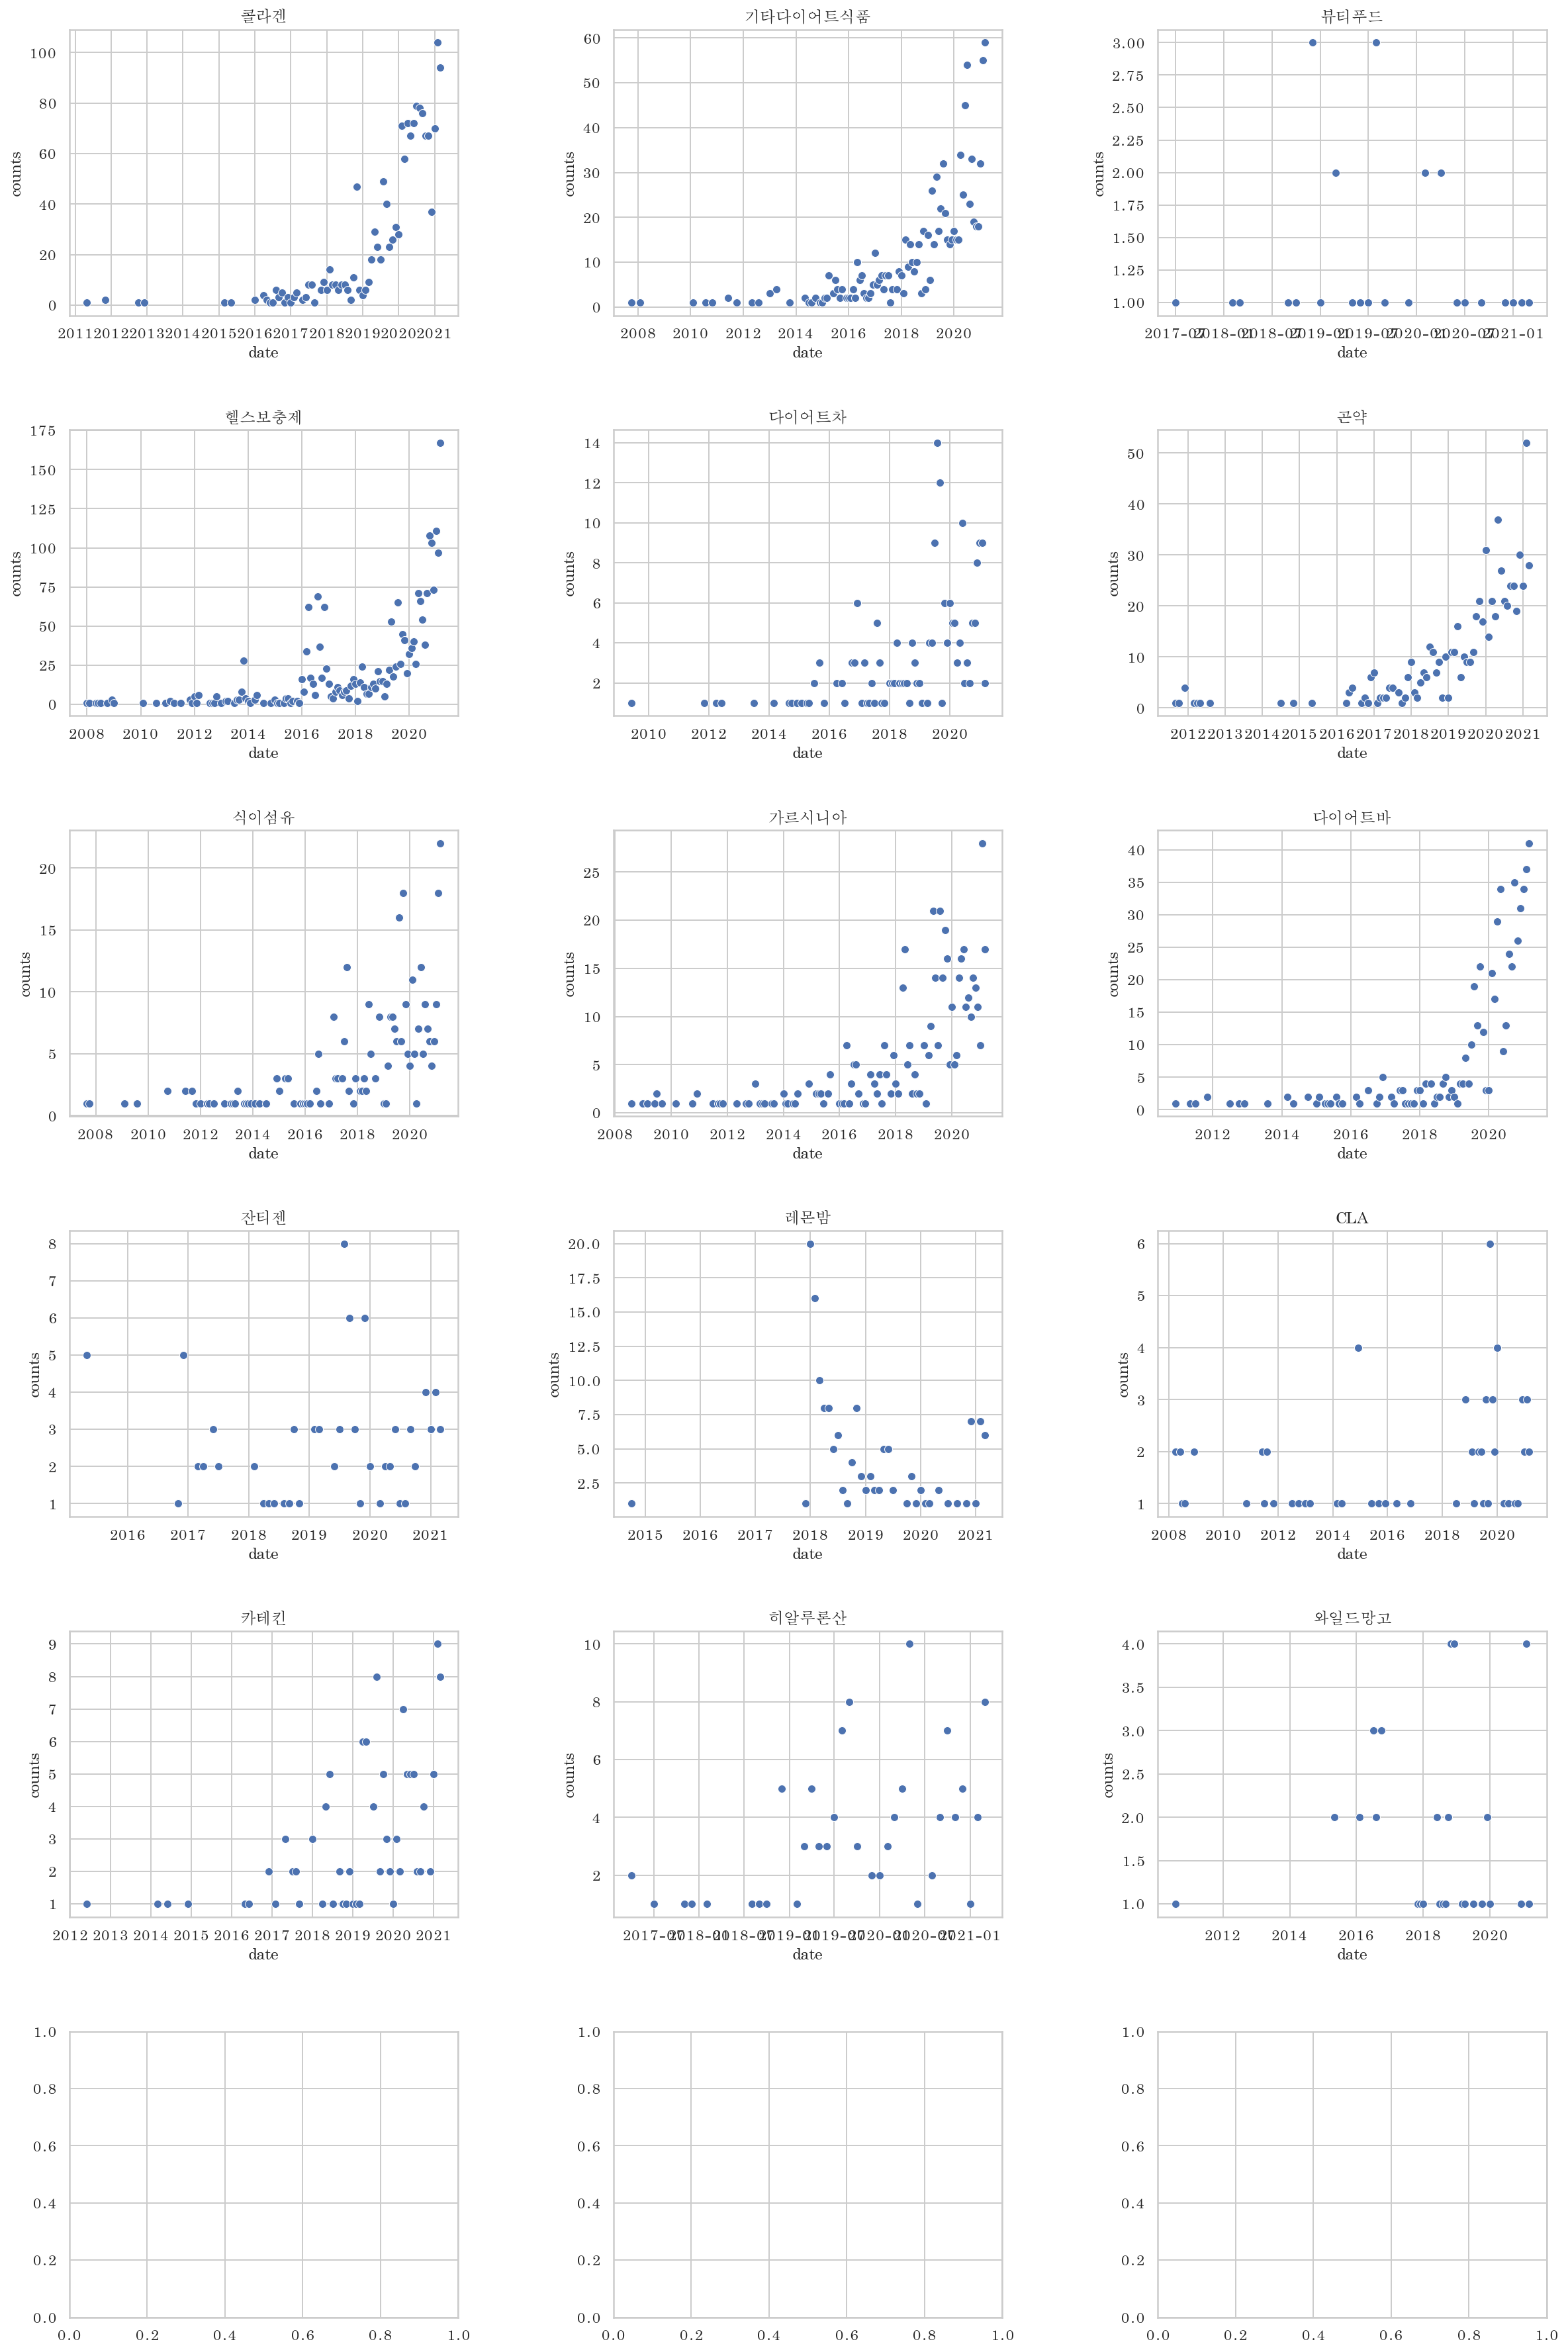

In [47]:
fig, axes = plt.subplots(nrows = (len(list(healthfood["cate_3"].unique())) // 3)+1, ncols = 3, figsize = (20, 30))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
cate_list = list(healthfood["cate_3"].unique())
for index, cate_name in enumerate(cate_list):
    grouping = healthfood[healthfood["cate_3"] == cate_name].groupby(["cate_3", "re_date"]).count().reset_index()
    ax = sns.scatterplot(x= "re_date", y = "name", data=grouping,
                     ax = axes[index//3, index%3])
    ax.set_title(cate_name)
    ax.set_ylabel("counts");ax.set_xlabel("date")
plt.show()

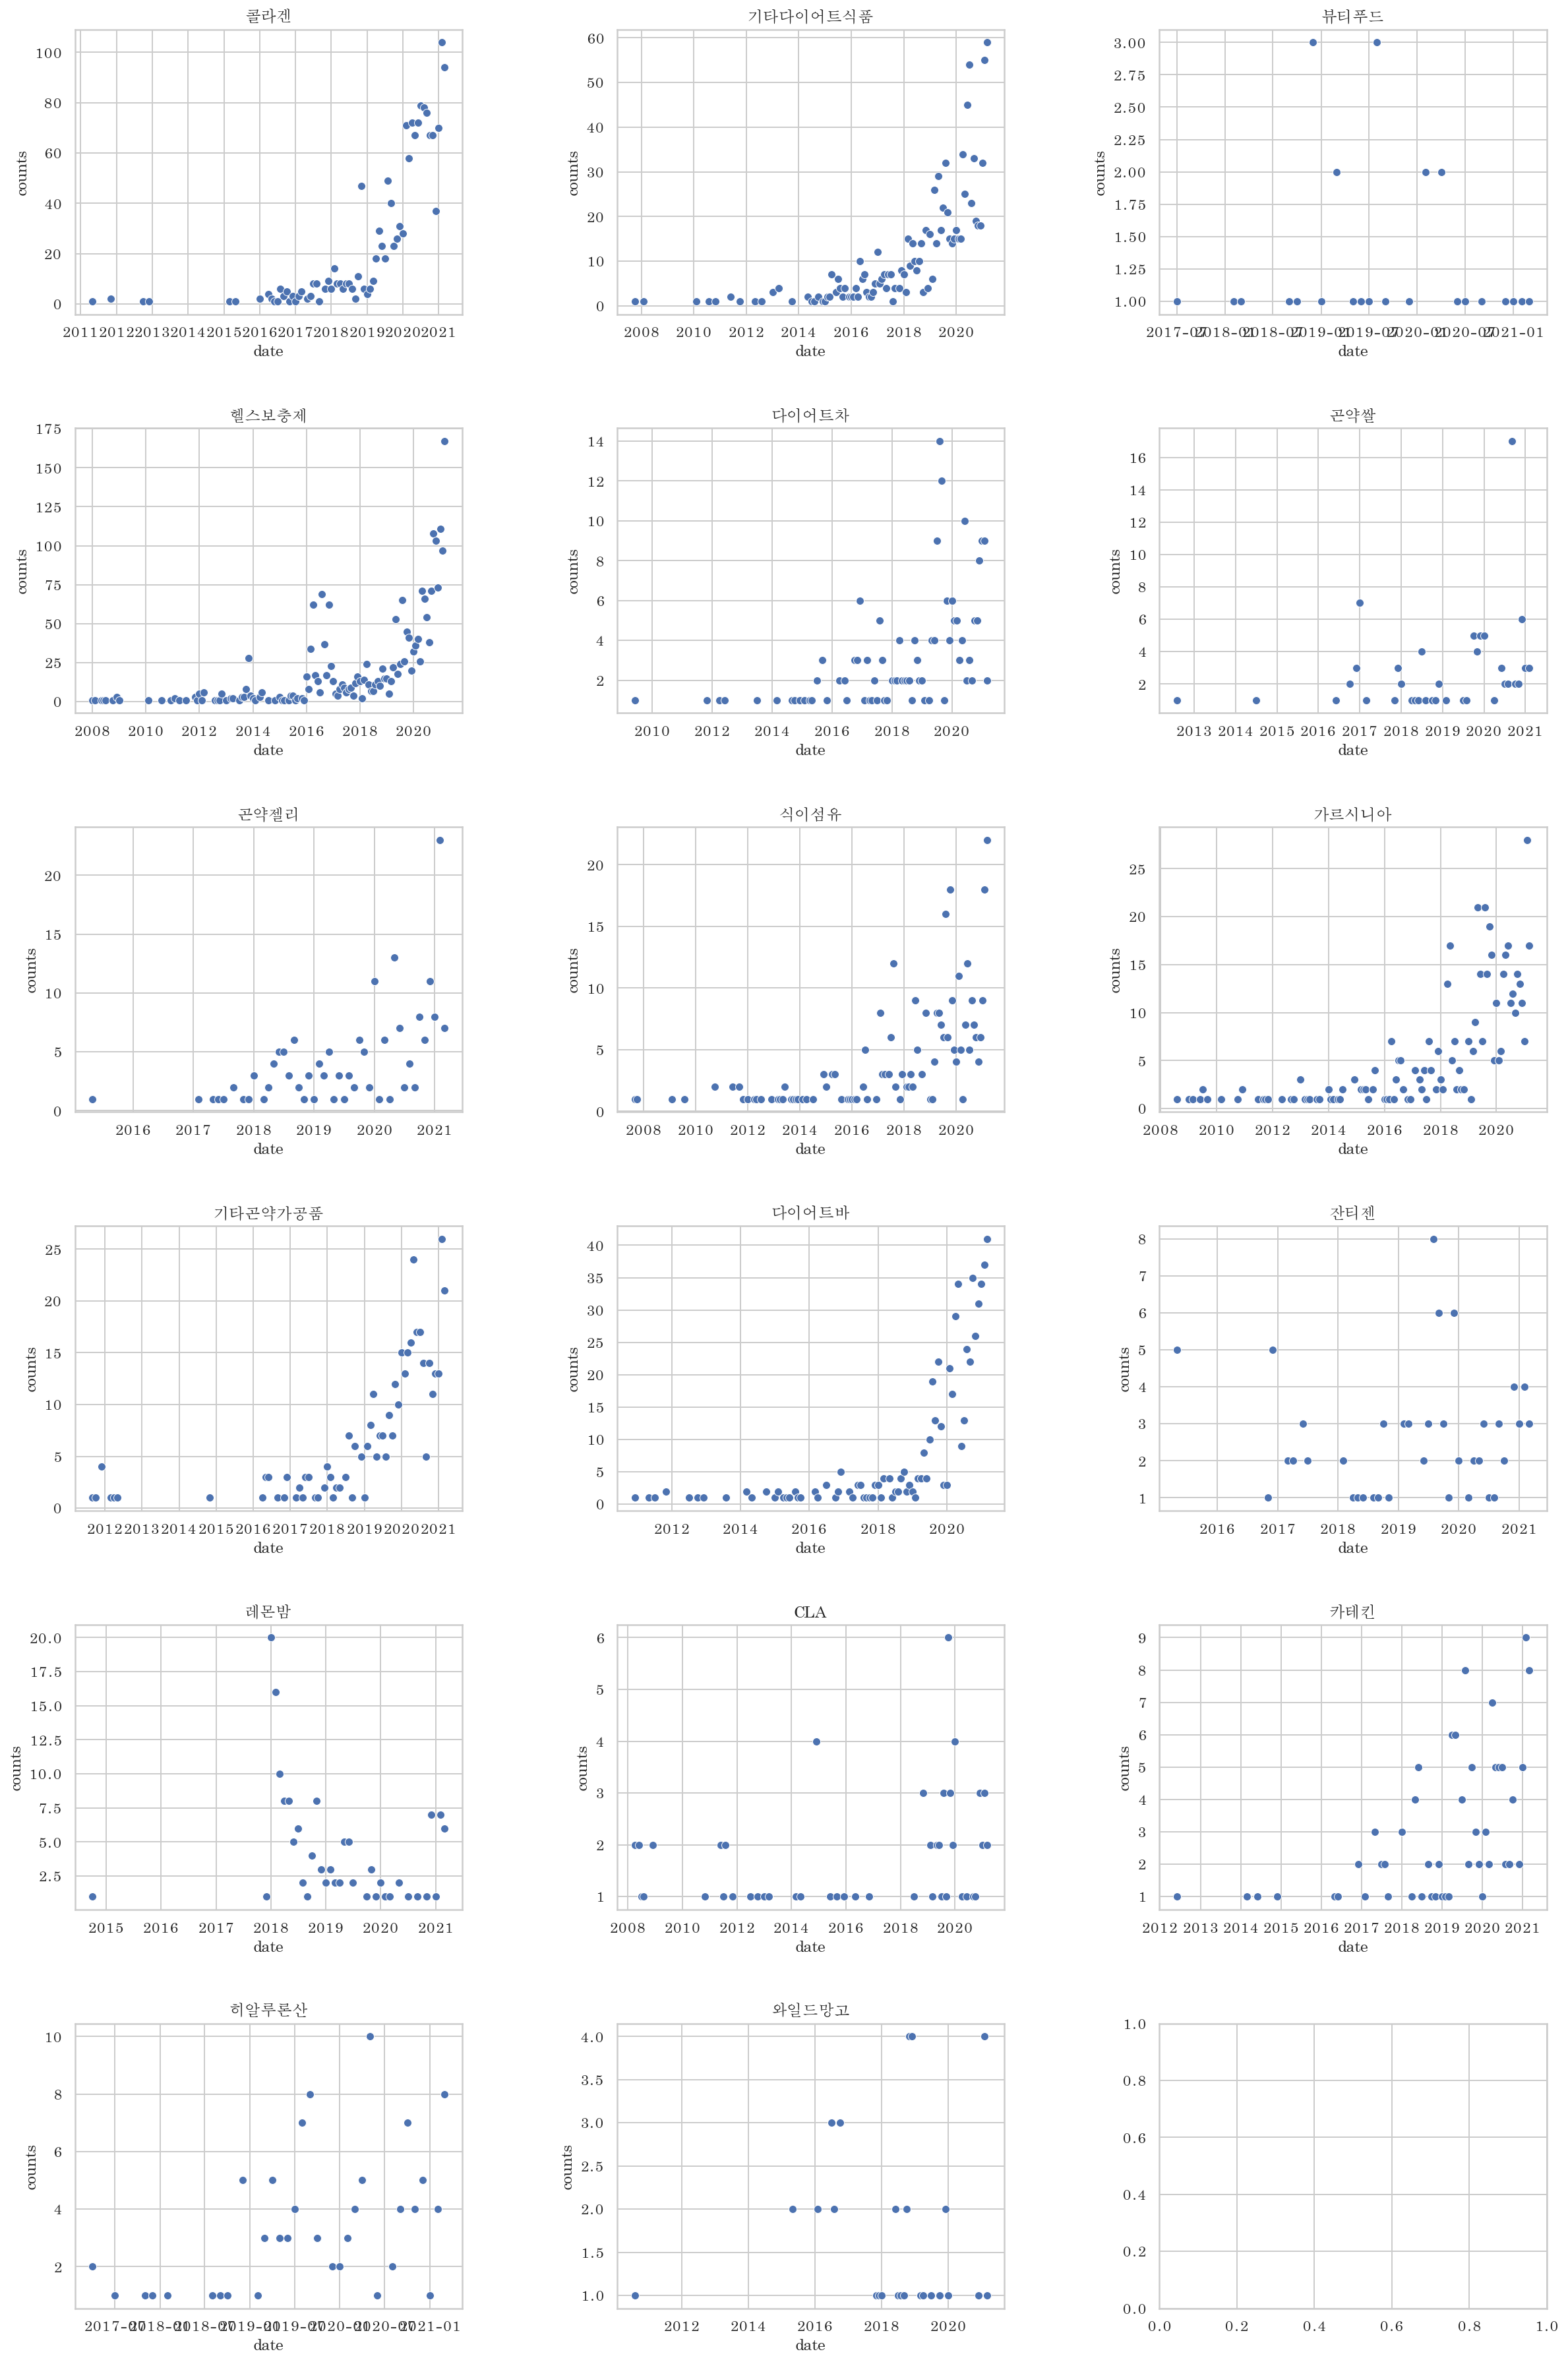

In [48]:
fig, axes = plt.subplots(nrows = (len(list(healthfood["cate_4"].unique())) // 3)+1, ncols = 3, figsize = (20, 30))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
cate_list = list(healthfood["cate_4"].unique())
for index, cate_name in enumerate(cate_list):
    grouping = healthfood[healthfood["cate_4"] == cate_name].groupby(["cate_4", "re_date"]).count().reset_index()
    ax = sns.scatterplot(x= "re_date", y = "name", data=grouping,
                     ax = axes[index//3, index%3])
    ax.set_title(cate_name)
    ax.set_ylabel("counts");ax.set_xlabel("date")
plt.show()

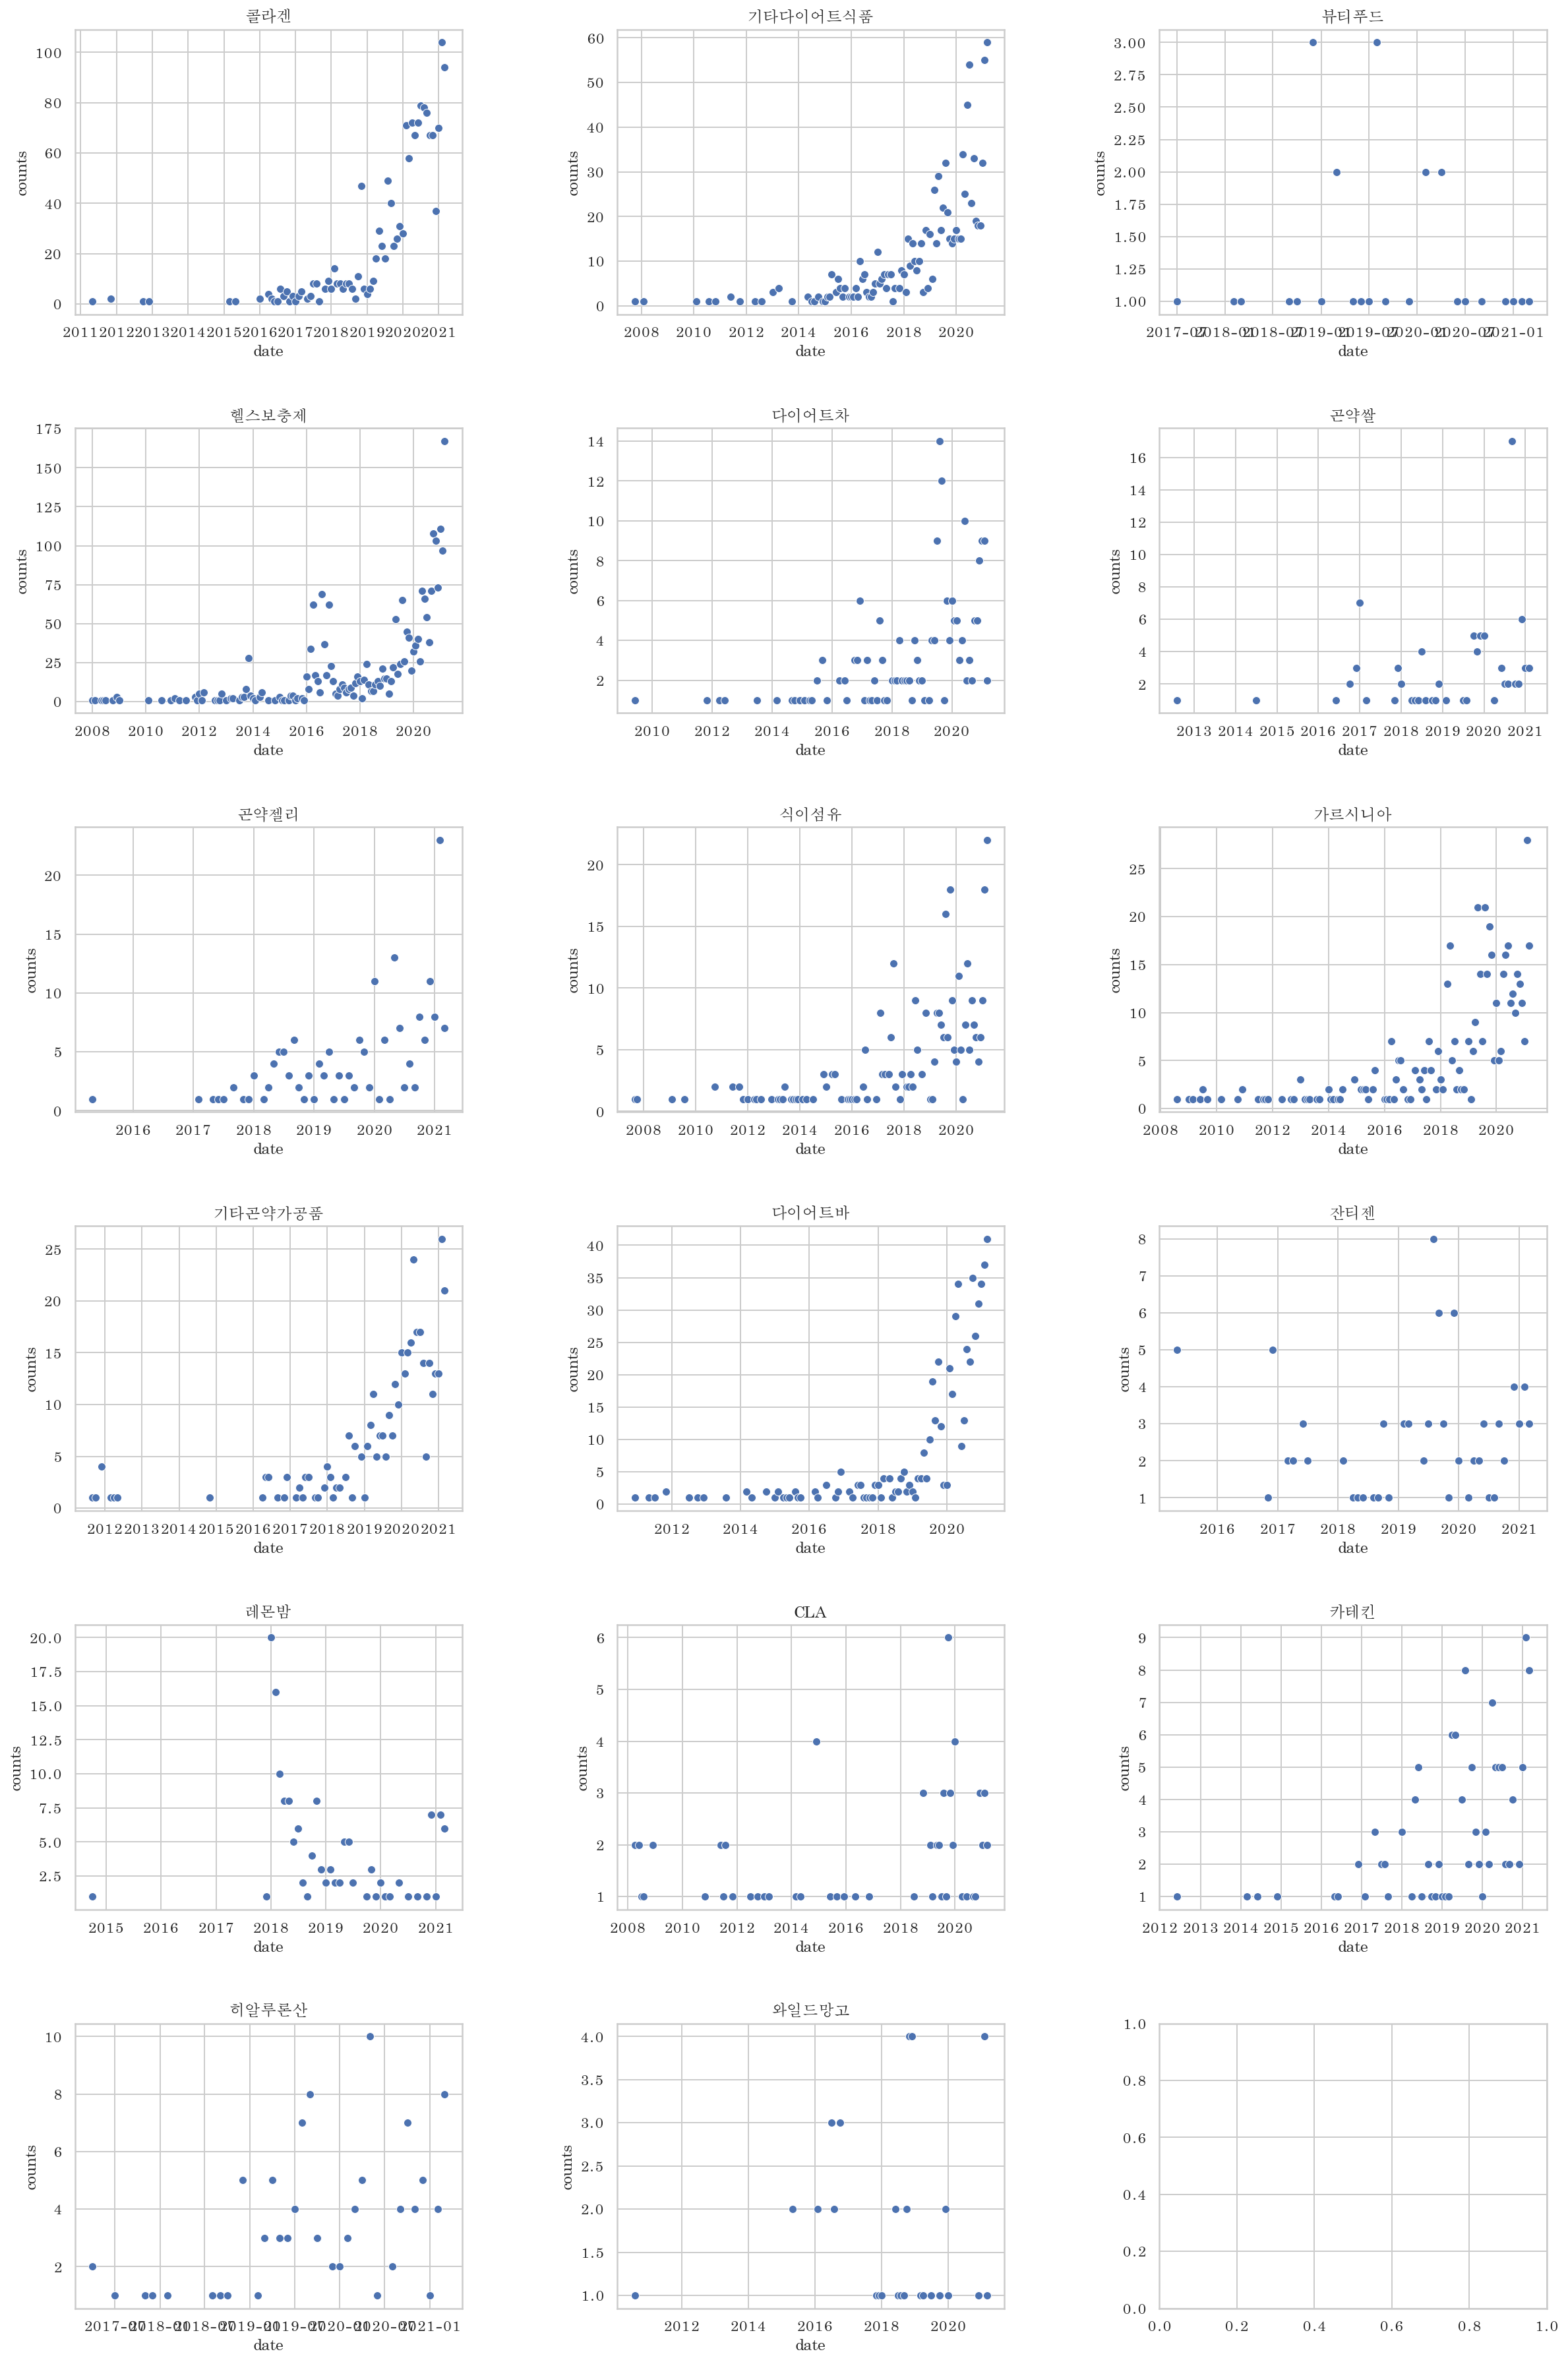

In [49]:
fig, axes = plt.subplots(nrows = (len(list(healthfood["cate_5"].unique())) // 3)+1, ncols = 3, figsize = (20, 30))
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
cate_list = list(healthfood["cate_5"].unique())
for index, cate_name in enumerate(cate_list):
    grouping = healthfood[healthfood["cate_5"] == cate_name].groupby(["cate_5", "re_date"]).count().reset_index()
    ax = sns.scatterplot(x= "re_date", y = "name", data=grouping,
                     ax = axes[index//3, index%3])
    ax.set_title(cate_name)
    ax.set_ylabel("counts");ax.set_xlabel("date")
plt.show()

In [50]:
# 여기까지, 데이터 시각화를 통해서 대략적인 데이터의 흐름을 확인
# 1. 건강/다이어트 식품은 16년도를 기점으로 시장이 세분화되고 커졌으며
# 2. 19년도부터는 전체 카테고리에서 세분화된 카테고리가 폭발적으로 증가하고 있고
# 3. 코로나 바이러스의 유행이 시작된 20년도에는 주로 다이어트식품과 관련된 것들이 큰 폭으로 증가하였다
# -> 건강/다이어트 식품 세분화와 시장 성장, 코로나이후 다이어트에 대한 관심도가 높음

In [51]:
# 다이어트 식품은 ?

In [52]:
# 그럼 이제, 각 데이터간의 상관괸계 등을 조금 더 딥하게 알아보고 숨겨진 이야기를(fact를 기반으로 가설을 수립) 찾아본다

In [53]:
healthfood.head(1)

name  price  brand cate_1  cate_2  \
0  절대콜라겐 - 프랑스 저분자 먹는 피쉬 어류 어린 가루 펩타이드 엘라스틴 비오틴  15000  절대콜라겐     식품  다이어트식품   

  cate_3 cate_4  review      date  tag cate_5    re_date  
0    콜라겐    콜라겐  127297  20170617  콜라겐    콜라겐 2017-06-01

In [54]:
nutrients.head(1)

name  price brand cate_1 cate_2 cate_3  \
88  SMDR 데이엔딩슬립스타트 (락티움 수면 영양제 보조제)  64500   NaN     식품   건강식품    영양제   

      cate_4  review      date  tag cate_5    re_date  
88  기타건강보조식품   15822  20191114  NaN  수면보조제 2019-11-01

In [55]:
health_cate = healthfood.drop(["name", "price", "brand", "date", "tag", "re_date"], axis=1)

In [56]:
health_cate_3 = health_cate.drop(["cate_1", "cate_2", "cate_4", "cate_5"], axis=1)

In [57]:
hcg_3 = health_cate_3.groupby("cate_3")

In [58]:
# for key, group in hcg_3:
#     print("* key", key)
#     print("*count", len(group))
#     print(group.head())
#     print('\n')

In [59]:
# 카테고리별 Sum(review), Count(cate) 처리

In [60]:
health_cate_3 = health_cate.drop(["cate_1", "cate_2", "cate_4", "cate_5"], axis=1)
grouped = health_cate_3.groupby("cate_3")
grouped_sum = grouped.sum()
grouped_count = grouped.count()
hcate_3_grouped = grouped.sum()
hcate_3_grouped["count"] = grouped_count["review"]
hcate_3_grouped.reset_index(level=["cate_3"], inplace=True)
hcate_3_grouped

review  count
cate_3                  
CLA        100271     75
가르시니아      637140    500
곤약         948905    679
기타다이어트식품  1576351    974
다이어트바      602834    563
다이어트차      248436    218
레몬밤        186714    149
뷰티푸드       209000     30
식이섬유       511951    344
와일드망고       31405     44
잔티젠        116790     97
카테킨        159077    136
콜라겐       2158735   1527
헬스보충제     2419394   2184
히알루론산      128833    113

In [77]:
health_cate_4 = health_cate.drop(["cate_1", "cate_2", "cate_3", "cate_5"], axis=1)
grouped = health_cate_4.groupby("cate_4")
grouped_sum = grouped.sum()
grouped_count = grouped.count()
hcate_4_grouped = grouped.sum()
hcate_4_grouped["count"] = grouped_count["review"]
hcate_4_grouped.reset_index(level=["cate_4"], inplace=True)
hcate_4_grouped

cate_4   review  count
0        CLA   100271     75
1      가르시니아   637140    500
2        곤약쌀   137200     97
3       곤약젤리   267685    190
4    기타곤약가공품   544020    392
5   기타다이어트식품  1576351    974
6      다이어트바   602834    563
7      다이어트차   248436    218
8        레몬밤   186714    149
9       뷰티푸드   209000     30
10      식이섬유   511951    344
11     와일드망고    31405     44
12       잔티젠   116790     97
13       카테킨   159077    136
14       콜라겐  2158735   1527
15     헬스보충제  2419394   2184
16     히알루론산   128833    113

In [78]:
health_cate_5 = health_cate.drop(["cate_1", "cate_2", "cate_3", "cate_4"], axis=1)
grouped = health_cate_5.groupby("cate_5")
grouped_sum = grouped.sum()
grouped_count = grouped.count()
hcate_5_grouped = grouped.sum()
hcate_5_grouped["count"] = grouped_count["review"]
hcate_5_grouped.reset_index(level=["cate_5"], inplace=True)
hcate_5_grouped

cate_5   review  count
0        CLA   100271     75
1      가르시니아   637140    500
2        곤약쌀   137200     97
3       곤약젤리   267685    190
4    기타곤약가공품   544020    392
5   기타다이어트식품  1576351    974
6      다이어트바   602834    563
7      다이어트차   248436    218
8        레몬밤   186714    149
9       뷰티푸드   209000     30
10      식이섬유   511951    344
11     와일드망고    31405     44
12       잔티젠   116790     97
13       카테킨   159077    136
14       콜라겐  2158735   1527
15     헬스보충제  2419394   2184
16     히알루론산   128833    113

In [63]:
nutrients_cate =  nutrients.drop(["name", "price", "brand", "date", "tag", "re_date"], axis=1)

In [79]:
nutrients_cate_3 = nutrients_cate.drop(["cate_1", "cate_2", "cate_4", "cate_5"], axis=1)
grouped = nutrients_cate_3.groupby("cate_3")
grouped_sum = grouped.sum()
grouped_count = grouped.count()
ncate_3_grouped = grouped.sum()
ncate_3_grouped["count"] = grouped_count["review"]
ncate_3_grouped.reset_index(level=["cate_3"], inplace=True)
ncate_3_grouped

cate_3    review  count
0   건강분말     21412     11
1   건강음료     18682      8
2    건강즙      1883      2
3  건강환/정     10842      9
4    과일즙      1473      1
5      꿀       939      1
6   비타민제   1291907    395
7    영양제  22347317   7388
8   한방재료      4563      1
9     홍삼     92917     16

In [80]:
nutrients_cate_4 = nutrients_cate.drop(["cate_1", "cate_2", "cate_3", "cate_5"], axis=1)
grouped = nutrients_cate_4.groupby("cate_4")
grouped_sum = grouped.sum()
grouped_count = grouped.count()
ncate_4_grouped = grouped.sum()
ncate_4_grouped["count"] = grouped_count["review"]
ncate_4_grouped.reset_index(level=["cate_4"], inplace=True)
ncate_4_grouped

cate_4   review  count
0         MSM   105677     67
1      감마리놀렌산   167060     95
2        건강분말    21412     11
3        건강음료    18682      8
4       건강환/정    10842      9
5       글루코사민   106528     71
6    기타건강보조식품  1976832   1044
7       기타건강즙     1883      2
8       기타비타민     3492      3
9           꿀     4209      3
10       로얄제리    35119     25
11        루테인  1853941    591
12       마그네슘   482758    156
13      멀티비타민   772203    241
14       밀크씨슬  1287660    324
15      보스웰리아   101881     54
16        비오틴    34625     10
17       비타민A     7335      4
18       비타민B   193894     80
19       비타민C   530036    130
20       비타민D   205210     71
21       비타민E     1717      2
22        석류즙     1473      1
23        셀레늄    38913     26
24       스쿠알렌     4620      3
25      스피루리나   164599     70
26       쏘팔메토   281522    119
27         아연   380133    140
28     알로에정/겔   116163     63
29         엽산   539926    159
30       오메가3  2606408    743
31         철분   338484    113
32         칼륨    47792     23
33         칼슘  1308957    423
34        코큐텐   279769    105
35       크릴오일   952109    227
36       클로렐라    20953     15
37        키토산    78429     36
38      폴리코사놀   127426     49
39    프로바이오틱스  6732132   1849
40      프로폴리스   669443    268
41    프리바이오틱스   577510    147
42       헛개나무     4563      1
43         홍삼    92917     16
44  환자식/영양보충식   271751    132
45         효모   232947    103

In [83]:
nutrients_cate_5 = nutrients_cate.drop(["cate_1", "cate_2", "cate_3", "cate_4"], axis=1)
grouped = nutrients_cate_5.groupby("cate_5")
grouped_sum = grouped.sum()
grouped_count = grouped.count()
ncate_5_grouped = grouped.sum()
ncate_5_grouped["count"] = grouped_count["review"]
ncate_5_grouped.reset_index(level=["cate_5"], inplace=True)
ncate_5_grouped

cate_5   review  count
0          MSM   105677     67
1         SAMe     1370      2
2       감마리놀렌산   167060     95
3         건강분말    21412     11
4         건강음료    18682      8
5        건강환/정    10842      9
6           곤약    50001      7
7          구연산    23610      7
8        글루코사민   106528     71
9     기타건강보조식품   805762    453
10       기타건강즙     1883      2
11       기타비타민     3492      3
12     기타식물추출물    63291     50
13       기타영양제    45545     23
14           꿀     4209      3
15       나토키나제    12666     12
16          노니    14860     13
17       녹용/녹혈    12444     18
18       대구 간유     3088      3
19        라이코펜     4819      3
20        로얄제리    35119     25
21         루테인  1853941    591
22        마그네슘   482758    156
23          마늘    15626     15
24          마카    40692     17
25         매스틱    39306     19
26       멀티비타민   772203    241
27        밀크씨슬  1287660    324
28     베타인 HCL     9168      5
29       베타카로틴    13348      4
30       보스웰리아   101881     54
31         비오틴    34625     10
32        비타민A     7335      4
33        비타민B   193894     80
34        비타민C   530036    130
35        비타민D   205210     71
36        비타민E     1717      2
37         석류즙     1473      1
38       석류추출물    12734     10
39         셀레늄    38913     26
40       수면보조제    95653     23
41       숙취해소제     5717      4
42        스쿠알렌     4620      3
43       스피루리나   164599     70
44        쏘팔메토   281522    119
45  아르기닌(아미노산)    65903     31
46        아미노산    33499     15
47          아연   380133    140
48      알로에정/겔   116163     63
49         양태반    32787      9
50        엘더베리    21024     11
51          엽산   539926    159
52        오메가3  2606408    743
53         요오드     5856      5
54       은행추출물    55746     23
55          철분   338484    113
56       초록입홍합   154894     91
57       초유단백질    84740     59
58          칼륨    47792     23
59          칼슘  1308957    423
60         커큐민    28003     15
61         코큐텐   279769    105
62        퀘르세틴     9380      7
63        크랜베리    14740      8
64        크릴오일   952109    227
65        클로렐라    20953     15
66         키토산    78429     36
67         타우린     3714      4
68        타트체리    32718      9
69       폴리코사놀   127426     49
70        폴리페놀     2081      2
71     프로바이오틱스  6732132   1849
72       프로폴리스   669443    268
73     프리바이오틱스   577510    147
74        헛개나무     4563      1
75         헤모힘    28252     12
76          홍삼    92917     16
77   환자식/영양보충식   271751    132
78          효모   232947    103
79          효소   133795     55